<a href="https://colab.research.google.com/github/dwjang0902/ExampleNew/blob/master/tflearn_Image_Inpainting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I. TFlearn을 활용한 Deep Learning
# Basics
# tf.reset_default_graph() 을 꼭 넣을 것
[CS 598 LAZ: Cutting-Edge Trends in Deep Learning and Recognition](http://slazebni.cs.illinois.edu/spring17)

[
tflearn/examples/basics/linear_regression.py](https://github.com/tflearn/tflearn/blob/master/examples/basics/linear_regression.py)

In [0]:
""" Linear Regression Example """

from __future__ import absolute_import, division, print_function
import matplotlib.pyplot as plt

import tflearn
import tensorflow as tf

tf.reset_default_graph()

# Regression data
X = [3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1]
Y = [1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]
plt.plot(X)
plt.plot(Y)

# Linear Regression graph
input_ = tflearn.input_data(shape=[None])
linear = tflearn.single_unit(input_)
regression = tflearn.regression(linear, optimizer='sgd', loss='mean_square',
                                metric='R2', learning_rate=0.01)
m = tflearn.DNN(regression)
m.fit(X, Y, n_epoch=1000, show_metric=True, snapshot_epoch=False)

print("\nRegression result:")
print("Y = " + str(m.get_weights(linear.W)) +
      "*X + " + str(m.get_weights(linear.b)))

print("\nTest prediction for x = 3.2, 3.3, 3.4:")
print(m.predict([3.2, 3.3, 3.4]))
# should output (close, not exact) y = [1.5315033197402954, 1.5585315227508545, 1.5855598449707031]

Training Step: 17  | total loss: 2.44505 | time: 0.005s
| SGD | epoch: 017 | loss: 2.44505 - R2: 0.2853 -- iter: 17/17


In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tflearn
import numpy as np

tf.reset_default_graph()

# Logical NOT operator
X = [[0.], [1.]]
Y = [[1.], [0.]]

print(X, type(X))
print(Y)

# Graph definition

with tf.Graph().as_default():
    g = tflearn.input_data(shape=[None, 1])
    g = tflearn.fully_connected(g, 128, activation='linear')
    g = tflearn.fully_connected(g, 128, activation='linear')
    g = tflearn.fully_connected(g, 1, activation='sigmoid')
    g = tflearn.regression(g, optimizer='sgd', learning_rate=2.,
                           loss='mean_square')

 # Model training
    m = tflearn.DNN(g)
    m.fit(X, Y, n_epoch=100, snapshot_epoch=False)
    
# Test model

    print("Testing NOT operator")
    print("NOT 0:", m.predict([[0.]]))
    print("NOT 1:", m.predict([[1.]]))

    
# Logical OR operator
X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
Y = [[0.], [1.], [1.], [1.]] 

# Graph definition

with tf.Graph().as_default():
    g = tflearn.input_data(shape=[None, 2])
    g = tflearn.fully_connected(g, 128, activation='linear')
    g = tflearn.fully_connected(g, 128, activation='linear')
    g = tflearn.fully_connected(g, 1, activation='sigmoid')
    g = tflearn.regression(g, optimizer='sgd', learning_rate=2.,
                           loss='mean_square')

    # Model training
    m = tflearn.DNN(g)
    m.fit(X, Y, n_epoch=100, snapshot_epoch=False)

    # Test model
    print("Testing OR operator")
    print("0 or 0:", m.predict([[0., 0.]]))
    print("0 or 1:", m.predict([[0., 1.]]))
    print("1 or 0:", m.predict([[1., 0.]]))
    print("1 or 1:", m.predict([[1., 1.]]))

    
'''

Going further: Graph combination with multiple optimizers

Create a XOR operator using product of NAND and OR operators

'''

# Data
X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
Y_nand = [[1.], [1.], [1.], [0.]]
Y_or = [[0.], [1.], [1.], [1.]]



# Graph definition
with tf.Graph().as_default():
    # Building a network with 2 optimizers
    g = tflearn.input_data(shape=[None, 2])

    # Nand operator definition
    g_nand = tflearn.fully_connected(g, 32, activation='linear')
    g_nand = tflearn.fully_connected(g_nand, 32, activation='linear')
    g_nand = tflearn.fully_connected(g_nand, 1, activation='sigmoid')
    g_nand = tflearn.regression(g_nand, optimizer='sgd',
                                learning_rate=2.,
                                loss='binary_crossentropy')

    # Or operator definition
    g_or = tflearn.fully_connected(g, 32, activation='linear')
    g_or = tflearn.fully_connected(g_or, 32, activation='linear')
    g_or = tflearn.fully_connected(g_or, 1, activation='sigmoid')
    g_or = tflearn.regression(g_or, optimizer='sgd',
                              learning_rate=2.,
                              loss='binary_crossentropy')

    # XOR merging Nand and Or operators
    g_xor = tflearn.merge([g_nand, g_or], mode='elemwise_mul')

    # Training
    m = tflearn.DNN(g_xor)
    m.fit(X, [Y_nand, Y_or], n_epoch=400, snapshot_epoch=False)

    # Testing

    print("Testing XOR operator")
    print("0 xor 0:", m.predict([[0., 0.]]))
    print("0 xor 1:", m.predict([[0., 1.]]))
    print("1 xor 0:", m.predict([[1., 0.]]))
    print("1 xor 1:", m.predict([[1., 1.]]))    

In [0]:
""" An example showing how to save/restore models and retrieve weights. """

from __future__ import absolute_import, division, print_function

import tflearn

import tflearn.datasets.mnist as mnist

tf.reset_default_graph()

# MNIST Data
X, Y, testX, testY = mnist.load_data(one_hot=True)
print(np.shape(X))
# Model
input_layer = tflearn.input_data(shape=[None, 784], name='input')
dense1 = tflearn.fully_connected(input_layer, 128, name='dense1')
dense2 = tflearn.fully_connected(dense1, 256, name='dense2')
softmax = tflearn.fully_connected(dense2, 10, activation='softmax')
regression = tflearn.regression(softmax, optimizer='adam',
                                learning_rate=0.001,
                                loss='categorical_crossentropy')

XX = tf.placeholder(shape=[None, 784], dtype = tf.float32)

# Define classifier, with model checkpoint (autosave)
model = tflearn.DNN(regression, checkpoint_path='model.tfl.ckpt')

# Train model, with model checkpoint every epoch and every 200 training steps.
model.fit(X, Y, n_epoch=1,
          validation_set=(testX, testY),
          show_metric=True,
          snapshot_epoch=True, # Snapshot (save & evaluate) model every epoch.
          snapshot_step=500, # Snapshot (save & evalaute) model every 500 steps.
          run_id='model_and_weights')

predicted = model.predict(testX)
prediction = np.argmax(predicted)
print(predicted)



# II. Example_2

In [0]:
# Example_2

# -*- coding: utf-8 -*-

""" Convolutional network applied to CIFAR-10 dataset classification task.

References:
    Learning Multiple Layers of Features from Tiny Images, A. Krizhevsky, 2009.

Links:
    [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

"""
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
#--------------------------------------------
from tensorflow import reset_default_graph
reset_default_graph()
tf.reset_default_graph()
#--------------------------------------------

# Data loading and preprocessing
from tflearn.datasets import cifar10
(X, Y), (X_test, Y_test) = cifar10.load_data()
X, Y = shuffle(X, Y)
print('chk_point_1')
print(Y[0])
Y = to_categorical(Y,10)
print(Y[0])
Y_test = to_categorical(Y_test,10)
print(np.shape(X))
print(np.shape(Y))

# Real-time data preprocessing
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

# Real-time data augmentation
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)



In [0]:

# Convolutional network building
network = input_data(shape=[None, 32, 32, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug)
network = conv_2d(network, 32, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 64, 3, activation='relu')
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)
network = fully_connected(network, 512, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 10, activation='softmax')
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

# Train using classifier
model = tflearn.DNN(network, tensorboard_verbose=0)
#X.reshape([-1, 32, 32, 3])
#model.fit(X,Y)
model.fit(X, Y, n_epoch=5, shuffle=True, validation_set=(X_test, Y_test),
          show_metric=True, batch_size=96, run_id='cifar10_cnn')

In [0]:
predicted = model.predict(X_test)
result = np.argmax(predicted, axis = 1)
print(result)

[3 8 8 ... 5 1 7]


#III.  Example_3 : Network in Network.

In [0]:
# -*- coding: utf-8 -*-

""" Network In Network.

Applying 'Network In Network' to CIFAR-10 classification task.

References:
    Network In Network. Min Li, Qiang Chen & Shuicheng Yan, 2014.

Links:
    http://arxiv.org/pdf/1312.4400v3.pdf

"""

from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, flatten
from tflearn.layers.conv import conv_2d, max_pool_2d, avg_pool_2d
from tflearn.layers.estimator import regression
import tensorflow
import numpy as np
tensorflow.reset_default_graph()

# Data loading and preprocessing
from tflearn.datasets import cifar10
(X, Y), (X_test, Y_test) = cifar10.load_data()
X, Y = shuffle(X[0:10000], Y[0:10000])
Y = to_categorical(Y,10)
Y_test = to_categorical(Y_test,10)

# Building 'Network In Network'
network = input_data(shape=[None, 32, 32, 3])
network = conv_2d(network, 192, 5, activation='relu')
network = conv_2d(network, 160, 1, activation='relu')
network = conv_2d(network, 96, 1, activation='relu')
network = max_pool_2d(network, 3, strides=2)
network = dropout(network, 0.5)
network = conv_2d(network, 192, 5, activation='relu')
network = conv_2d(network, 192, 1, activation='relu')
network = conv_2d(network, 192, 1, activation='relu')
network = avg_pool_2d(network, 3, strides=2)
network = dropout(network, 0.5)
network = conv_2d(network, 192, 3, activation='relu')
network = conv_2d(network, 192, 1, activation='relu')
network = conv_2d(network, 10, 1, activation='relu')
network = avg_pool_2d(network, 8)
network = flatten(network)
network = regression(network, optimizer='adam',
                     loss='softmax_categorical_crossentropy',
                     learning_rate=0.001)

# Training
model = tflearn.DNN(network)
model.fit(X, Y, n_epoch=10, shuffle=True,
          show_metric=True, batch_size=128, run_id='cifar10_net_in_net')
predicted = model.predict(X_test[1000:1010])
print(np.argmax(predicted, axis = 1))

Training Step: 789  | total loss: 1.35238 | time: 345.261s
| Adam | epoch: 010 | loss: 1.35238 - acc: 0.5161 -- iter: 09984/10000
Training Step: 790  | total loss: 1.34869 | time: 349.725s
| Adam | epoch: 010 | loss: 1.34869 - acc: 0.5122 -- iter: 10000/10000
--


NameError: ignored

In [0]:
predicted = model.predict(X_test[1000:1100])
print(np.argmax(predicted, axis = 1))

[5 0 6 4 0 9 1 8 3 7 0 8 6 0 5 4 1 6 0 0 1 6 0 0 3 5 6 0 6 6 5 5 6 3 5 6 6
 0 2 4 5 5 4 0 8 5 4 0 1 7 7 6 8 3 9 5 3 3 3 8 9 9 3 5 6 3 9 0 9 6 5 6 0 7
 3 8 0 0 0 6 6 6 9 2 2 4 4 6 5 6 0 8 3 2 3 6 7 5 8 4]


#IV.  [ICML 2016 Tutorial on Deep Residual Networks](http://kaiminghe.com/icml16tutorial/index.html)

In [0]:
# -*- coding: utf-8 -*-

""" Deep Residual Network.

Applying a Deep Residual Network to CIFAR-10 Dataset classification task.

References:
    - K. He, X. Zhang, S. Ren, and J. Sun. Deep Residual Learning for Image
      Recognition, 2015.
    - Learning Multiple Layers of Features from Tiny Images, A. Krizhevsky, 2009.

Links:
    - [Deep Residual Network](http://arxiv.org/pdf/1512.03385.pdf)
    - [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

"""

from __future__ import division, print_function, absolute_import

import tflearn
import tensorflow
import numpy as np
tensorflow.reset_default_graph()

# Residual blocks
# 32 layers: n=5, 56 layers: n=9, 110 layers: n=18
n = 5

# Data loading
from tflearn.datasets import cifar10
(X, Y), (testX, testY) = cifar10.load_data()
Y = tflearn.data_utils.to_categorical(Y,10)
testY = tflearn.data_utils.to_categorical(testY,10)

# Real-time data preprocessing
img_prep = tflearn.ImagePreprocessing()
img_prep.add_featurewise_zero_center(per_channel=True)

# Real-time data augmentation
img_aug = tflearn.ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_crop([32, 32], padding=4)

# Building Residual Network
net = tflearn.input_data(shape=[None, 32, 32, 3],
                         data_preprocessing=img_prep,
                         data_augmentation=img_aug)
net = tflearn.conv_2d(net, 16, 3, regularizer='L2', weight_decay=0.0001)
net = tflearn.residual_block(net, n, 16)
net = tflearn.residual_block(net, 1, 32, downsample=True)
net = tflearn.residual_block(net, n-1, 32)
net = tflearn.residual_block(net, 1, 64, downsample=True)
net = tflearn.residual_block(net, n-1, 64)
net = tflearn.batch_normalization(net)
net = tflearn.activation(net, 'relu')
net = tflearn.global_avg_pool(net)
# Regression
net = tflearn.fully_connected(net, 10, activation='softmax')
mom = tflearn.Momentum(0.1, lr_decay=0.1, decay_step=32000, staircase=True)
net = tflearn.regression(net, optimizer=mom,
                         loss='categorical_crossentropy')


Instructions for updating:
Colocations handled automatically by placer.


100.0% 170500096 / 170498071


('Succesfully downloaded', 'cifar-10-python.tar.gz', 170498071, 'bytes.')
File Extracted in Current Directory
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [0]:
# Training
model = tflearn.DNN(net, checkpoint_path='model_resnet_cifar10',
                    max_checkpoints=10, tensorboard_verbose=0,
                    clip_gradients=0.)

model.fit(X, Y, n_epoch=1, validation_set=(testX, testY),
          snapshot_epoch=False, snapshot_step=500,
          show_metric=True, batch_size=128, shuffle=True,
          run_id='resnet_cifar10')

Training Step: 352  | total loss: 1.31593 | time: 1085.630s
| Momentum | epoch: 001 | loss: 1.31593 - acc: 0.5271 -- iter: 45056/50000


In [0]:
predicted = model.predict(X_test[1000:1100])
print(np.argmax(predicted, axis = 1))

[5 8 1 4 8 8 1 8 3 6 8 8 6 1 5 6 1 6 8 8 1 1 8 8 5 5 6 0 6 6 3 3 3 6 3 3 6
 7 2 2 5 5 2 4 8 6 2 8 1 1 1 6 8 5 1 5 5 5 6 8 9 1 6 6 5 2 1 1 1 6 5 6 8 7
 6 8 8 0 8 6 6 6 1 2 2 4 4 6 6 6 8 8 6 3 6 6 7 6 1 2]


#V.  Google Inception (v3)

In [0]:
# -*- coding: utf-8 -*-

""" GoogLeNet.
Applying 'GoogLeNet' to Oxford's 17 Category Flower Dataset classification task.
References:
    - Szegedy, Christian, et al.
    Going deeper with convolutions.
    - 17 Category Flower Dataset. Maria-Elena Nilsback and Andrew Zisserman.
Links:
    - [GoogLeNet Paper](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Szegedy_Going_Deeper_With_2015_CVPR_paper.pdf)
    - [Flower Dataset (17)](http://www.robots.ox.ac.uk/~vgg/data/flowers/17/)
"""

from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d, avg_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.merge_ops import merge
from tflearn.layers.estimator import regression
import tensorflow
import numpy as np
tensorflow.reset_default_graph()

import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True, resize_pics=(227, 227))

network = input_data(shape=[None, 227, 227, 3])
conv1_7_7 = conv_2d(network, 64, 7, strides=2, activation='relu', name='conv1_7_7_s2')
pool1_3_3 = max_pool_2d(conv1_7_7, 3, strides=2)
pool1_3_3 = local_response_normalization(pool1_3_3)
conv2_3_3_reduce = conv_2d(pool1_3_3, 64, 1, activation='relu', name='conv2_3_3_reduce')
conv2_3_3 = conv_2d(conv2_3_3_reduce, 192, 3, activation='relu', name='conv2_3_3')
conv2_3_3 = local_response_normalization(conv2_3_3)
pool2_3_3 = max_pool_2d(conv2_3_3, kernel_size=3, strides=2, name='pool2_3_3_s2')

# 3a
inception_3a_1_1 = conv_2d(pool2_3_3, 64, 1, activation='relu', name='inception_3a_1_1')
inception_3a_3_3_reduce = conv_2d(pool2_3_3, 96, 1, activation='relu', name='inception_3a_3_3_reduce')
inception_3a_3_3 = conv_2d(inception_3a_3_3_reduce, 128, filter_size=3,  activation='relu', name='inception_3a_3_3')
inception_3a_5_5_reduce = conv_2d(pool2_3_3, 16, filter_size=1, activation='relu', name='inception_3a_5_5_reduce')
inception_3a_5_5 = conv_2d(inception_3a_5_5_reduce, 32, filter_size=5, activation='relu', name='inception_3a_5_5')
inception_3a_pool = max_pool_2d(pool2_3_3, kernel_size=3, strides=1, name='inception_3a_pool')
inception_3a_pool_1_1 = conv_2d(inception_3a_pool, 32, filter_size=1, activation='relu', name='inception_3a_pool_1_1')
inception_3a_output = merge([inception_3a_1_1, inception_3a_3_3, inception_3a_5_5, inception_3a_pool_1_1], mode='concat', axis=3)

# 3b
inception_3b_1_1 = conv_2d(inception_3a_output, 128, filter_size=1, activation='relu', name='inception_3b_1_1')
inception_3b_3_3_reduce = conv_2d(inception_3a_output, 128, filter_size=1, activation='relu', name='inception_3b_3_3_reduce')
inception_3b_3_3 = conv_2d(inception_3b_3_3_reduce, 192, filter_size=3, activation='relu', name='inception_3b_3_3')
inception_3b_5_5_reduce = conv_2d(inception_3a_output, 32, filter_size=1, activation='relu', name='inception_3b_5_5_reduce')
inception_3b_5_5 = conv_2d(inception_3b_5_5_reduce, 96, filter_size=5,  name='inception_3b_5_5')
inception_3b_pool = max_pool_2d(inception_3a_output, kernel_size=3, strides=1,  name='inception_3b_pool')
inception_3b_pool_1_1 = conv_2d(inception_3b_pool, 64, filter_size=1, activation='relu', name='inception_3b_pool_1_1')
inception_3b_output = merge([inception_3b_1_1, inception_3b_3_3, inception_3b_5_5, inception_3b_pool_1_1], mode='concat', axis=3, name='inception_3b_output')
pool3_3_3 = max_pool_2d(inception_3b_output, kernel_size=3, strides=2, name='pool3_3_3')

# 4a
inception_4a_1_1 = conv_2d(pool3_3_3, 192, filter_size=1, activation='relu', name='inception_4a_1_1')
inception_4a_3_3_reduce = conv_2d(pool3_3_3, 96, filter_size=1, activation='relu', name='inception_4a_3_3_reduce')
inception_4a_3_3 = conv_2d(inception_4a_3_3_reduce, 208, filter_size=3,  activation='relu', name='inception_4a_3_3')
inception_4a_5_5_reduce = conv_2d(pool3_3_3, 16, filter_size=1, activation='relu', name='inception_4a_5_5_reduce')
inception_4a_5_5 = conv_2d(inception_4a_5_5_reduce, 48, filter_size=5,  activation='relu', name='inception_4a_5_5')
inception_4a_pool = max_pool_2d(pool3_3_3, kernel_size=3, strides=1,  name='inception_4a_pool')
inception_4a_pool_1_1 = conv_2d(inception_4a_pool, 64, filter_size=1, activation='relu', name='inception_4a_pool_1_1')
inception_4a_output = merge([inception_4a_1_1, inception_4a_3_3, inception_4a_5_5, inception_4a_pool_1_1], mode='concat', axis=3, name='inception_4a_output')

# 4b
inception_4b_1_1 = conv_2d(inception_4a_output, 160, filter_size=1, activation='relu', name='inception_4a_1_1')
inception_4b_3_3_reduce = conv_2d(inception_4a_output, 112, filter_size=1, activation='relu', name='inception_4b_3_3_reduce')
inception_4b_3_3 = conv_2d(inception_4b_3_3_reduce, 224, filter_size=3, activation='relu', name='inception_4b_3_3')
inception_4b_5_5_reduce = conv_2d(inception_4a_output, 24, filter_size=1, activation='relu', name='inception_4b_5_5_reduce')
inception_4b_5_5 = conv_2d(inception_4b_5_5_reduce, 64, filter_size=5,  activation='relu', name='inception_4b_5_5')
inception_4b_pool = max_pool_2d(inception_4a_output, kernel_size=3, strides=1,  name='inception_4b_pool')
inception_4b_pool_1_1 = conv_2d(inception_4b_pool, 64, filter_size=1, activation='relu', name='inception_4b_pool_1_1')
inception_4b_output = merge([inception_4b_1_1, inception_4b_3_3, inception_4b_5_5, inception_4b_pool_1_1], mode='concat', axis=3, name='inception_4b_output')

# 4c
inception_4c_1_1 = conv_2d(inception_4b_output, 128, filter_size=1, activation='relu', name='inception_4c_1_1')
inception_4c_3_3_reduce = conv_2d(inception_4b_output, 128, filter_size=1, activation='relu', name='inception_4c_3_3_reduce')
inception_4c_3_3 = conv_2d(inception_4c_3_3_reduce, 256,  filter_size=3, activation='relu', name='inception_4c_3_3')
inception_4c_5_5_reduce = conv_2d(inception_4b_output, 24, filter_size=1, activation='relu', name='inception_4c_5_5_reduce')
inception_4c_5_5 = conv_2d(inception_4c_5_5_reduce, 64,  filter_size=5, activation='relu', name='inception_4c_5_5')
inception_4c_pool = max_pool_2d(inception_4b_output, kernel_size=3, strides=1)
inception_4c_pool_1_1 = conv_2d(inception_4c_pool, 64, filter_size=1, activation='relu', name='inception_4c_pool_1_1')
inception_4c_output = merge([inception_4c_1_1, inception_4c_3_3, inception_4c_5_5, inception_4c_pool_1_1], mode='concat', axis=3, name='inception_4c_output')

# 4d
inception_4d_1_1 = conv_2d(inception_4c_output, 112, filter_size=1, activation='relu', name='inception_4d_1_1')
inception_4d_3_3_reduce = conv_2d(inception_4c_output, 144, filter_size=1, activation='relu', name='inception_4d_3_3_reduce')
inception_4d_3_3 = conv_2d(inception_4d_3_3_reduce, 288, filter_size=3, activation='relu', name='inception_4d_3_3')
inception_4d_5_5_reduce = conv_2d(inception_4c_output, 32, filter_size=1, activation='relu', name='inception_4d_5_5_reduce')
inception_4d_5_5 = conv_2d(inception_4d_5_5_reduce, 64, filter_size=5,  activation='relu', name='inception_4d_5_5')
inception_4d_pool = max_pool_2d(inception_4c_output, kernel_size=3, strides=1,  name='inception_4d_pool')
inception_4d_pool_1_1 = conv_2d(inception_4d_pool, 64, filter_size=1, activation='relu', name='inception_4d_pool_1_1')
inception_4d_output = merge([inception_4d_1_1, inception_4d_3_3, inception_4d_5_5, inception_4d_pool_1_1], mode='concat', axis=3, name='inception_4d_output')

# 4e
inception_4e_1_1 = conv_2d(inception_4d_output, 256, filter_size=1, activation='relu', name='inception_4e_1_1')
inception_4e_3_3_reduce = conv_2d(inception_4d_output, 160, filter_size=1, activation='relu', name='inception_4e_3_3_reduce')
inception_4e_3_3 = conv_2d(inception_4e_3_3_reduce, 320, filter_size=3, activation='relu', name='inception_4e_3_3')
inception_4e_5_5_reduce = conv_2d(inception_4d_output, 32, filter_size=1, activation='relu', name='inception_4e_5_5_reduce')
inception_4e_5_5 = conv_2d(inception_4e_5_5_reduce, 128,  filter_size=5, activation='relu', name='inception_4e_5_5')
inception_4e_pool = max_pool_2d(inception_4d_output, kernel_size=3, strides=1,  name='inception_4e_pool')
inception_4e_pool_1_1 = conv_2d(inception_4e_pool, 128, filter_size=1, activation='relu', name='inception_4e_pool_1_1')
inception_4e_output = merge([inception_4e_1_1, inception_4e_3_3, inception_4e_5_5, inception_4e_pool_1_1], axis=3, mode='concat')
pool4_3_3 = max_pool_2d(inception_4e_output, kernel_size=3, strides=2, name='pool_3_3')

# 5a
inception_5a_1_1 = conv_2d(pool4_3_3, 256, filter_size=1, activation='relu', name='inception_5a_1_1')
inception_5a_3_3_reduce = conv_2d(pool4_3_3, 160, filter_size=1, activation='relu', name='inception_5a_3_3_reduce')
inception_5a_3_3 = conv_2d(inception_5a_3_3_reduce, 320, filter_size=3, activation='relu', name='inception_5a_3_3')
inception_5a_5_5_reduce = conv_2d(pool4_3_3, 32, filter_size=1, activation='relu', name='inception_5a_5_5_reduce')
inception_5a_5_5 = conv_2d(inception_5a_5_5_reduce, 128, filter_size=5,  activation='relu', name='inception_5a_5_5')
inception_5a_pool = max_pool_2d(pool4_3_3, kernel_size=3, strides=1,  name='inception_5a_pool')
inception_5a_pool_1_1 = conv_2d(inception_5a_pool, 128, filter_size=1, activation='relu', name='inception_5a_pool_1_1')
inception_5a_output = merge([inception_5a_1_1, inception_5a_3_3, inception_5a_5_5, inception_5a_pool_1_1], axis=3, mode='concat')

# 5b
inception_5b_1_1 = conv_2d(inception_5a_output, 384, filter_size=1, activation='relu', name='inception_5b_1_1')
inception_5b_3_3_reduce = conv_2d(inception_5a_output, 192, filter_size=1, activation='relu', name='inception_5b_3_3_reduce')
inception_5b_3_3 = conv_2d(inception_5b_3_3_reduce, 384,  filter_size=3, activation='relu', name='inception_5b_3_3')
inception_5b_5_5_reduce = conv_2d(inception_5a_output, 48, filter_size=1, activation='relu', name='inception_5b_5_5_reduce')
inception_5b_5_5 = conv_2d(inception_5b_5_5_reduce, 128, filter_size=5, activation='relu', name='inception_5b_5_5')
inception_5b_pool = max_pool_2d(inception_5a_output, kernel_size=3, strides=1,  name='inception_5b_pool')
inception_5b_pool_1_1 = conv_2d(inception_5b_pool, 128, filter_size=1, activation='relu', name='inception_5b_pool_1_1')
inception_5b_output = merge([inception_5b_1_1, inception_5b_3_3, inception_5b_5_5, inception_5b_pool_1_1], axis=3, mode='concat')
pool5_7_7 = avg_pool_2d(inception_5b_output, kernel_size=7, strides=1)
pool5_7_7 = dropout(pool5_7_7, 0.4)

# fc
loss = fully_connected(pool5_7_7, 17, activation='softmax')
network = regression(loss, optimizer='momentum',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)


Instructions for updating:
Colocations handled automatically by placer.


100.0% 60276736 / 60270631


('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted
Starting to parse images...
Parsing Done!
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [0]:
# to train
model = tflearn.DNN(network, checkpoint_path='model_googlenet',
                    max_checkpoints=1, tensorboard_verbose=2)

model.fit(X, Y, n_epoch=10, validation_set=0.1, shuffle=True,
          show_metric=True, batch_size=64, snapshot_step=200,
          snapshot_epoch=False, run_id='googlenet_oxflowers17')

Training Step: 98  | total loss: 2.83187 | time: 337.967s
| Momentum | epoch: 005 | loss: 2.83187 - acc: 0.0623 -- iter: 1152/1224


In [0]:
predicted = model.predict(X_test[1000:1100])
print(np.argmax(predicted, axis = 1))

#VI.  Auto_encoder

Training Step: 4299  | total loss: 0.00799 | time: 4.722s
| Adam | epoch: 020 | loss: 0.00799 -- iter: 54784/55000
Training Step: 4300  | total loss: 0.00799 | time: 5.760s
| Adam | epoch: 020 | loss: 0.00799 | val_loss: 0.00770 -- iter: 55000/55000
--

Test encoding of X[0]:
[[-2.090302    6.629537   -5.5999236  -3.8926182  -0.46427786 -0.33251452
   3.0193722   3.2897937  -2.4267228  -2.8943653   1.5124867   4.9228964
  -0.04025275 -0.4657368  -1.4136059  -1.0527903  -0.09531406  3.9808805
   1.7020825  -1.7520924  -3.7208202   4.5884595  -5.078692    3.3162193
   0.77721345  3.3005385  -1.4142967   0.0913866  -2.7791436   0.7338202
  -0.86572206 -1.3383337  -2.8394027  -2.442057    0.65705377 -2.3675072
   1.512826    0.13391909 -2.8856192  -3.001115   -0.32846403 -4.2266254
  -0.02268809 -3.9225495  -1.2562214   0.3892479   4.7718735  -1.3597736
  -3.6465871   1.6950722  -3.0981176   1.421564   -0.60067314 -3.4733639
  -3.2445855  -2.5317292  -2.9188411   5.3614855   2.1704977   4.

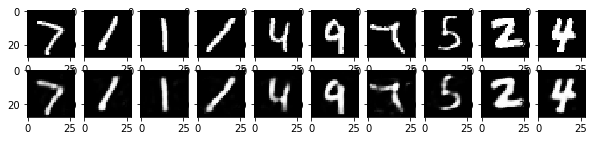

In [0]:
# -*- coding: utf-8 -*-

""" Auto Encoder Example.

Using an auto encoder on MNIST handwritten digits.

References:
    Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based
    learning applied to document recognition." Proceedings of the IEEE,
    86(11):2278-2324, November 1998.

Links:
    [MNIST Dataset] http://yann.lecun.com/exdb/mnist/

"""
from __future__ import division, print_function, absolute_import

import numpy as np
import matplotlib.pyplot as plt
import tflearn

import tensorflow
import numpy as np
tensorflow.reset_default_graph()

# Data loading and preprocessing
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data(one_hot=True)

# Building the encoder
encoder = tflearn.input_data(shape=[None, 784])
encoder = tflearn.fully_connected(encoder, 256)
encoder = tflearn.fully_connected(encoder, 64)

# Building the decoder
decoder = tflearn.fully_connected(encoder, 256)
decoder = tflearn.fully_connected(decoder, 784, activation='sigmoid')

# Regression, with mean square error
net = tflearn.regression(decoder, optimizer='adam', learning_rate=0.001,
                         loss='mean_square', metric=None)

# Training the auto encoder
model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(X, X, n_epoch=20, validation_set=(testX, testX),
          run_id="auto_encoder", batch_size=256)

# Encoding X[0] for test
print("\nTest encoding of X[0]:")
# New model, re-using the same session, for weights sharing
encoding_model = tflearn.DNN(encoder, session=model.session)
print(encoding_model.predict([X[0]]))

# Testing the image reconstruction on new data (test set)
print("\nVisualizing results after being encoded and decoded:")
testX = tflearn.data_utils.shuffle(testX)[0]
# Applying encode and decode over test set
encode_decode = model.predict(testX)
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    temp = [[ii, ii, ii] for ii in list(testX[i])]
    a[0][i].imshow(np.reshape(temp, (28, 28, 3)))
    temp = [[ii, ii, ii] for ii in list(encode_decode[i])]
    a[1][i].imshow(np.reshape(temp, (28, 28, 3)))
f.show()
plt.draw()
#plt.waitforbuttonpress()

#VII.  Variational Auto-Encoder
[VAE Paper](https://arxiv.org/abs/1312.6114)
[초짜 대학원생 입장에서 이해하는 Generative Adversarial Nets ](http://jaejunyoo.blogspot.com/2017/01/generative-adversarial-nets-1.html)
[NIPS 2016 Tutorial: Generative Adversarial Networks](https://arxiv.org/abs/1701.00160)
[Tutorial - What is a variational autoencoder?](https://jaan.io/what-is-variational-autoencoder-vae-tutorial/)

In [0]:
# -*- coding: utf-8 -*-

""" Variational Auto-Encoder Example.

Using a variational auto-encoder to generate digits images from noise.
MNIST handwritten digits are used as training examples.

References:
    - Auto-Encoding Variational Bayes The International Conference on Learning
    Representations (ICLR), Banff, 2014. D.P. Kingma, M. Welling
    - Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based
    learning applied to document recognition." Proceedings of the IEEE,
    86(11):2278-2324, November 1998.

Links:
    - [VAE Paper] https://arxiv.org/abs/1312.6114
    - [MNIST Dataset] http://yann.lecun.com/exdb/mnist/

"""
from __future__ import division, print_function, absolute_import

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import tensorflow as tf

import tflearn

# Data loading and preprocessing
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data(one_hot=True)

# Params
original_dim = 784 # MNIST images are 28x28 pixels
hidden_dim = 256
latent_dim = 2

# Building the encoder
encoder = tflearn.input_data(shape=[None, 784], name='input_images')
encoder = tflearn.fully_connected(encoder, hidden_dim, activation='relu')
z_mean = tflearn.fully_connected(encoder, latent_dim)
z_std = tflearn.fully_connected(encoder, latent_dim)

# Sampler: Normal (gaussian) random distribution
eps = tf.random_normal(tf.shape(z_std), dtype=tf.float32, mean=0., stddev=1.0,
                       name='epsilon')
z = z_mean + tf.exp(z_std / 2) * eps 

# Building the decoder (with scope to re-use these layers later)
decoder = tflearn.fully_connected(z, hidden_dim, activation='relu',
                                  scope='decoder_h')
decoder = tflearn.fully_connected(decoder, original_dim, activation='sigmoid',
                                  scope='decoder_out')

# Define VAE Loss
def vae_loss(x_reconstructed, x_true):
    # Reconstruction loss
    encode_decode_loss = x_true * tf.log(1e-10 + x_reconstructed) \
                         + (1 - x_true) * tf.log(1e-10 + 1 - x_reconstructed)
    encode_decode_loss = -tf.reduce_sum(encode_decode_loss, 1)
    # KL Divergence loss
    kl_div_loss = 1 + z_std - tf.square(z_mean) - tf.exp(z_std)
    kl_div_loss = -0.5 * tf.reduce_sum(kl_div_loss, 1)
    return tf.reduce_mean(encode_decode_loss + kl_div_loss)

net = tflearn.regression(decoder, optimizer='rmsprop', learning_rate=0.001,
                         loss=vae_loss, metric=None, name='target_images')

# We will need 2 models, one for training that will learn the latent
# representation, and one that can take random normal noise as input and
# use the decoder part of the network to generate an image

# Train the VAE
training_model = tflearn.DNN(net, tensorboard_verbose=0)
training_model.fit({'input_images': X}, {'target_images': X}, n_epoch=100,
                   validation_set=(testX, testX), batch_size=256, run_id="vae")

# Build an image generator (re-using the decoding layers)
# Input data is a normal (gaussian) random distribution (with dim = latent_dim)
input_noise = tflearn.input_data(shape=[None, latent_dim], name='input_noise')
decoder = tflearn.fully_connected(input_noise, hidden_dim, activation='relu',
                                  scope='decoder_h', reuse=True)
decoder = tflearn.fully_connected(decoder, original_dim, activation='sigmoid',
                                  scope='decoder_out', reuse=True)
generator_model = tflearn.DNN(decoder, session=training_model.session)



Training Step: 21499  | total loss: 148.06474 | time: 5.586s
| RMSProp | epoch: 100 | loss: 148.06474 -- iter: 54784/55000
Training Step: 21500  | total loss: 147.23611 | time: 6.636s
| RMSProp | epoch: 100 | loss: 147.23611 | val_loss: 151.76996 -- iter: 55000/55000
--


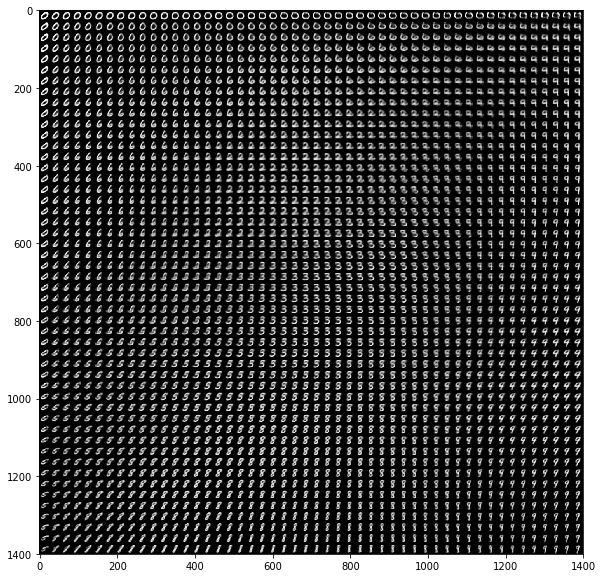

In [0]:
# Building a manifold of generated digits
n = 50 # Figure row size
figure = np.zeros((28 * n, 28 * n))
# Random normal distributions to feed network with
x_axis = norm.ppf(np.linspace(0.001, 0.900, n))
y_axis = norm.ppf(np.linspace(0.001, 0.900, n))

for i, x in enumerate(x_axis):
    for j, y in enumerate(y_axis):
        samples = np.array([[x, y]])
        x_reconstructed = generator_model.predict({'input_noise': samples}) # 주의 사항 : 여기서 sample은 z-value를 의미한다. 즉 epsilon이 아니다...
        digit = np.array(x_reconstructed[0]).reshape(28, 28) # z-value로부터 이미지를 생성한다.
        figure[i * 28: (i + 1) * 28, j * 28: (j + 1) * 28] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()


In [0]:
x_axis = norm.ppf(np.linspace(0.001, 0.900, n))
y_axis = norm.ppf(np.linspace(0.001, 0.900, n))

print(x_axis)
print(y_axis)

#VIII. GAN
[1. A Beginner's Guide to Generative Adversarial Networks (GANs)](https://skymind.ai/wiki/generative-adversarial-network-gan)

[2. Image Completion with Deep Learning in TensorFlow](http://bamos.github.io/2016/08/09/deep-completion/#step-1-interpreting-images-as-samples-from-a-probability-distribution)

 [3. Introductory guide to Generative Adversarial Networks (GANs) and their promise!](https://www.analyticsvidhya.com/blog/2017/06/introductory-generative-adversarial-networks-gans/)

[Collection of generative models, e.g. GAN, VAE in Pytorch and Tensorflow](https://github.com/wiseodd/generative-models)

[프로그램 소스](https://github.com/fabulousjeong)



Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0000 D loss: -0.6104 G loss: -2.016

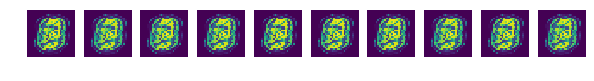

Epoch: 0001 D loss: -0.1587 G loss: -3.046Epoch: 0002 D loss: -0.1342 G loss: -3.034Epoch: 0003 D loss: -0.4735 G loss: -1.543Epoch: 0004 D loss: -0.2874 G loss: -2.163Epoch: 0005 D loss: -0.4267 G loss: -2.322Epoch: 0006 D loss: -0.3216 G loss: -2.374Epoch: 0007 D loss: -0.2213 G loss: -2.407Epoch: 0008 D loss: -0.5467 G loss: -2.164Epoch: 0009 D loss: -0.2293 G loss: -2.691

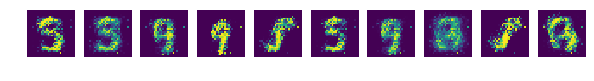

Epoch: 0010 D loss: -0.3978 G loss: -2.339Epoch: 0011 D loss: -0.2591 G loss: -2.562Epoch: 0012 D loss: -0.3824 G loss: -2.07Epoch: 0013 D loss: -0.4818 G loss: -2.142Epoch: 0014 D loss: -0.5522 G loss: -1.911Epoch: 0015 D loss: -0.4811 G loss: -2.097Epoch: 0016 D loss: -0.5294 G loss: -2.165Epoch: 0017 D loss: -0.44 G loss: -2.263Epoch: 0018 D loss: -0.297 G loss: -2.37Epoch: 0019 D loss: -0.4999 G loss: -2.212

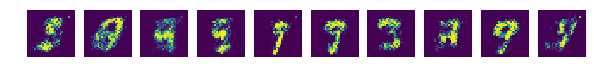

Epoch: 0020 D loss: -0.4977 G loss: -2.468Epoch: 0021 D loss: -0.4286 G loss: -2.264Epoch: 0022 D loss: -0.4257 G loss: -2.678Epoch: 0023 D loss: -0.4312 G loss: -2.522Epoch: 0024 D loss: -0.4974 G loss: -2.36Epoch: 0025 D loss: -0.3419 G loss: -2.589Epoch: 0026 D loss: -0.3518 G loss: -2.665Epoch: 0027 D loss: -0.315 G loss: -3.163Epoch: 0028 D loss: -0.4823 G loss: -2.838Epoch: 0029 D loss: -0.2467 G loss: -3.03

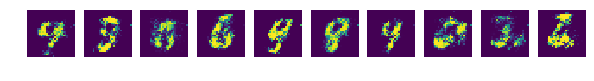

Epoch: 0030 D loss: -0.5117 G loss: -2.625Epoch: 0031 D loss: -0.3851 G loss: -2.81Epoch: 0032 D loss: -0.3572 G loss: -2.92Epoch: 0033 D loss: -0.4635 G loss: -2.368Epoch: 0034 D loss: -0.703 G loss: -2.043Epoch: 0035 D loss: -0.5604 G loss: -2.599Epoch: 0036 D loss: -0.5619 G loss: -2.257Epoch: 0037 D loss: -0.5105 G loss: -2.542Epoch: 0038 D loss: -0.5267 G loss: -2.286Epoch: 0039 D loss: -0.4407 G loss: -2.69

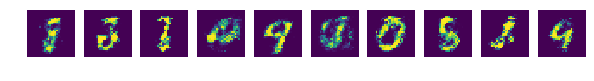

Epoch: 0040 D loss: -0.5705 G loss: -2.183Epoch: 0041 D loss: -0.6665 G loss: -2.345Epoch: 0042 D loss: -0.6228 G loss: -2.239Epoch: 0043 D loss: -0.5772 G loss: -2.507Epoch: 0044 D loss: -0.5777 G loss: -1.932Epoch: 0045 D loss: -0.5744 G loss: -2.528Epoch: 0046 D loss: -0.6261 G loss: -2.475Epoch: 0047 D loss: -0.6625 G loss: -1.957Epoch: 0048 D loss: -0.6249 G loss: -2.027Epoch: 0049 D loss: -0.6154 G loss: -2.164

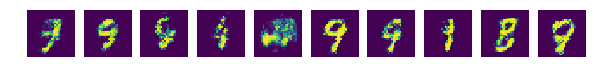

Epoch: 0050 D loss: -0.6216 G loss: -2.257Epoch: 0051 D loss: -0.6288 G loss: -2.076Epoch: 0052 D loss: -0.5999 G loss: -1.94Epoch: 0053 D loss: -0.5107 G loss: -2.325Epoch: 0054 D loss: -0.6305 G loss: -2.341Epoch: 0055 D loss: -0.6983 G loss: -2.0Epoch: 0056 D loss: -0.5304 G loss: -2.358Epoch: 0057 D loss: -0.6077 G loss: -2.144Epoch: 0058 D loss: -0.6614 G loss: -2.189Epoch: 0059 D loss: -0.7308 G loss: -2.072

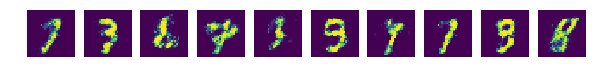

Epoch: 0060 D loss: -0.7298 G loss: -2.021Epoch: 0061 D loss: -0.6787 G loss: -2.134Epoch: 0062 D loss: -0.8485 G loss: -2.089Epoch: 0063 D loss: -0.8098 G loss: -1.861Epoch: 0064 D loss: -0.8656 G loss: -1.78Epoch: 0065 D loss: -0.67 G loss: -2.017Epoch: 0066 D loss: -0.6928 G loss: -2.141Epoch: 0067 D loss: -0.6403 G loss: -1.954Epoch: 0068 D loss: -0.7734 G loss: -1.802Epoch: 0069 D loss: -0.8207 G loss: -1.781

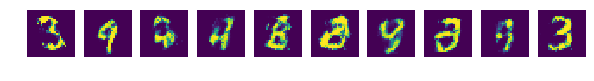

Epoch: 0070 D loss: -0.7881 G loss: -1.88Epoch: 0071 D loss: -0.8795 G loss: -1.957Epoch: 0072 D loss: -0.7655 G loss: -2.004Epoch: 0073 D loss: -0.7415 G loss: -1.971Epoch: 0074 D loss: -0.8516 G loss: -1.93Epoch: 0075 D loss: -0.6437 G loss: -1.931Epoch: 0076 D loss: -0.6172 G loss: -2.147Epoch: 0077 D loss: -0.757 G loss: -2.044Epoch: 0078 D loss: -0.7272 G loss: -1.973Epoch: 0079 D loss: -0.6723 G loss: -2.028

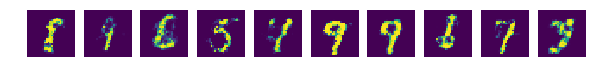

Epoch: 0080 D loss: -0.6848 G loss: -1.795Epoch: 0081 D loss: -0.6294 G loss: -1.956Epoch: 0082 D loss: -0.6948 G loss: -2.025Epoch: 0083 D loss: -0.6661 G loss: -2.225Epoch: 0084 D loss: -0.6342 G loss: -2.043Epoch: 0085 D loss: -0.5908 G loss: -2.171Epoch: 0086 D loss: -0.6349 G loss: -2.551Epoch: 0087 D loss: -0.6476 G loss: -2.081Epoch: 0088 D loss: -0.5862 G loss: -1.987Epoch: 0089 D loss: -0.6572 G loss: -2.119

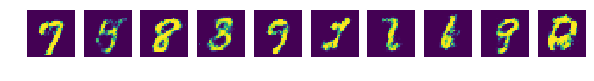

Epoch: 0090 D loss: -0.6807 G loss: -1.967Epoch: 0091 D loss: -0.6452 G loss: -1.817Epoch: 0092 D loss: -0.785 G loss: -2.016Epoch: 0093 D loss: -0.6035 G loss: -1.838Epoch: 0094 D loss: -0.6956 G loss: -2.1Epoch: 0095 D loss: -0.7826 G loss: -2.033Epoch: 0096 D loss: -0.6265 G loss: -2.124Epoch: 0097 D loss: -0.613 G loss: -2.022Epoch: 0098 D loss: -0.7587 G loss: -2.063Epoch: 0099 D loss: -0.5486 G loss: -2.168

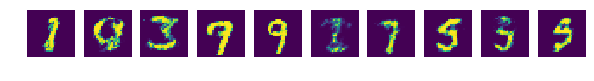

최적화 완료!


In [0]:
# GAN 이해를 위한 기초 프로그램 ...
# from https://github.com/golbin/TensorFlow-Tutorials/blob/master/09%20-%20GAN/01%20-%20GAN.py
# 2016년에 가장 관심을 많이 받았던 비감독(Unsupervised) 학습 방법인
# Generative Adversarial Network(GAN)을 구현해봅니다.
# https://arxiv.org/abs/1406.2661
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 옵션 설정
######
total_epoch = 100
batch_size = 100
learning_rate = 0.0002
# 신경망 레이어 구성 옵션
n_hidden = 256
n_input = 28 * 28
n_noise = 128  # 생성기의 입력값으로 사용할 노이즈의 크기

#########
# 신경망 모델 구성
######
# GAN 도 Unsupervised 학습이므로 Autoencoder 처럼 Y 를 사용하지 않습니다.
X = tf.placeholder(tf.float32, [None, n_input])
# 노이즈 Z를 입력값으로 사용합니다.
Z = tf.placeholder(tf.float32, [None, n_noise])

# 생성기 신경망에 사용하는 변수들입니다.
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden]))
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

# 판별기 신경망에 사용하는 변수들입니다.
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))
# 판별기의 최종 결과값은 얼마나 진짜와 가깝냐를 판단하는 한 개의 스칼라값입니다.
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1]))


# 생성기(G) 신경망을 구성합니다.
def generator(noise_z):
    hidden = tf.nn.relu(
                    tf.matmul(noise_z, G_W1) + G_b1)
    output = tf.nn.sigmoid(
                    tf.matmul(hidden, G_W2) + G_b2)

    return output


# 판별기(D) 신경망을 구성합니다.
def discriminator(inputs):
    hidden = tf.nn.relu(
                    tf.matmul(inputs, D_W1) + D_b1)
    output = tf.nn.sigmoid(
                    tf.matmul(hidden, D_W2) + D_b2)

    return output


# 랜덤한 노이즈(Z)를 만듭니다.
def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))


# 노이즈를 이용해 랜덤한 이미지를 생성합니다.
G = generator(Z)
# 노이즈를 이용해 생성한 이미지가 진짜 이미지인지 판별한 값을 구합니다.
D_gene = discriminator(G)
# 진짜 이미지를 이용해 판별한 값을 구합니다.
D_real = discriminator(X)

# 논문에 따르면, GAN 모델의 최적화는 loss_G 와 loss_D 를 최대화 하는 것 입니다.
# 다만 loss_D와 loss_G는 서로 연관관계가 있기 때문에 두 개의 손실값이 항상 같이 증가하는 경향을 보이지는 않을 것 입니다.
# loss_D가 증가하려면 loss_G는 하락해야하고, loss_G가 증가하려면 loss_D는 하락해야하는 경쟁관계에 있기 때문입니다.
# 논문의 수식에 따른 다음 로직을 보면 loss_D 를 최대화하기 위해서는 D_gene 값을 최소화하게 됩니다.
# 판별기에 진짜 이미지를 넣었을 때에도 최대값을 : tf.log(D_real)
# 가짜 이미지를 넣었을 때에도 최대값을 : tf.log(1 - D_gene)
# 갖도록 학습시키기 때문입니다.
# 이것은 판별기는 생성기가 만들어낸 이미지가 가짜라고 판단하도록 판별기 신경망을 학습시킵니다.
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_gene))
# 반면 loss_G 를 최대화하기 위해서는 D_gene 값을 최대화하게 되는데,
# 이것은 가짜 이미지를 넣었을 때, 판별기가 최대한 실제 이미지라고 판단하도록 생성기 신경망을 학습시킵니다.
# 논문에서는 loss_D 와 같은 수식으로 최소화 하는 생성기를 찾지만,
# 결국 D_gene 값을 최대화하는 것이므로 다음과 같이 사용할 수 있습니다.
loss_G = tf.reduce_mean(tf.log(D_gene))

# loss_D 를 구할 때는 판별기 신경망에 사용되는 변수만 사용하고,
# loss_G 를 구할 때는 생성기 신경망에 사용되는 변수만 사용하여 최적화를 합니다.
D_var_list = [D_W1, D_b1, D_W2, D_b2]
G_var_list = [G_W1, G_b1, G_W2, G_b2]

# GAN 논문의 수식에 따르면 loss 를 극대화 해야하지만, minimize 하는 최적화 함수를 사용하기 때문에
# 최적화 하려는 loss_D 와 loss_G 에 음수 부호를 붙여줍니다.
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D,
                                                         var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G,
                                                         var_list=G_var_list)

#########
# 신경망 모델 학습
######
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)

        # 판별기와 생성기 신경망을 각각 학습시킵니다.
        _, loss_val_D = sess.run([train_D, loss_D],
                                 feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G],
                                 feed_dict={Z: noise})

    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G), end='')


#########
# 학습이 되어가는 모습을 보기 위해 주기적으로 이미지를 생성하여 저장
######
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z: noise})

        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

        for i in range(sample_size):
            ax[i].set_axis_off()
            sample_reshape = np.reshape(samples[i], (28, 28))
            #plt.imshow(sample_reshape)
            ax[i].imshow(sample_reshape)
            plt.axis('off')
            #imshow(sample_reshape)        
        #plt.savefig('samples/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        plt.show()

print('최적화 완료!')



#IX [Generative Adversarial Denoising Autoencoder for Face Completion](https://www.cc.gatech.edu/~hays/7476/projects/Avery_Wenchen/)
[1. Introduction to Turing Learning and GANs](https://towardsdatascience.com/comprehensive-introduction-to-turing-learning-and-gans-part-1-81f6d02e644d)
[2. Advanced Topics in GANs](https://towardsdatascience.com/comprehensive-introduction-to-turing-learning-and-gans-part-2-fd8e4a70775)
[3. GANs vs. Autoencoders: Comparison of Deep Generative Models](https://towardsdatascience.com/gans-vs-autoencoders-comparison-of-deep-generative-models-985cf15936ea)

[Harvard-IACS/2019-computefest : 이미지 데이터](https://github.com/Harvard-IACS/2019-computefest/tree/master/Friday)
[Generative Adversarial Network (GAN) in TensorFlow - Part 2 : 이미지 데이터](https://mlnotebook.github.io/post/GAN2/)
[Large-scale CelebFaces Attributes (CelebA) Dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)

[구현참조 ](https://github.com/bamos/dcgan-completion.tensorflow)
[Image Completion with Deep Learning in TensorFlow](http://bamos.github.io/2016/08/09/deep-completion/)

[Data Augmentations for n-Dimensional Image Input to CNNs](https://mlnotebook.github.io)
[프로그램 설명서,BN등](https://mlnotebook.github.io/post/GAN4/)

In [0]:
# Load the Drive helper and mount; 구글 드라이브를 마운팅하는 루틴이다.
from google.colab import drive
"""
- This will prompt for authorization.
- force_remount=True 는 강제적으로 mount를 재개할 때 사용합니다. 
- 또한 drive 내 다른 폴더를 mount point로 지정할 수는 없는 것 같습니다. 
"""
#drive.mount('/content/drive') #이것을 먼저사용한다.
# 이후에 authentication code를 넣어 줘야한다, 실행을 하면 연결해야하는 URL이 주어지고, URL에 연결하면 코드를 얻을 수 있다. 이코드를 입력해 주면된다
drive.mount('/content/drive', force_remount=True) # 중간에 끊어진 경우에 다시연결할 때 사용한다



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# 마운트 된 드라이버에서 파일의 리스트를 읽어보는 루틴이다
import os
os.listdir("/content/drive/My Drive/")
im_loc = '/content/drive/My Drive/Colab Notebooks/celeba_short/img_align_celeba_short'
im_file_list = os.listdir(im_loc)
print(im_loc)
print(im_file_list)

/content/drive/My Drive/Colab Notebooks/celeba_short/img_align_celeba_short
['004531.jpg', '004534.jpg', '004539.jpg', '004537.jpg', '004536.jpg', '004532.jpg', '004535.jpg', '004538.jpg', '004533.jpg', '004540.jpg', '004541.jpg', '004543.jpg', '004548.jpg', '004550.jpg', '004544.jpg', '004542.jpg', '004546.jpg', '004545.jpg', '004547.jpg', '004549.jpg', '004551.jpg', '004560.jpg', '004559.jpg', '004552.jpg', '004555.jpg', '004553.jpg', '004556.jpg', '004558.jpg', '004557.jpg', '004554.jpg', '004561.jpg', '004567.jpg', '004566.jpg', '004564.jpg', '004563.jpg', '004565.jpg', '004562.jpg', '004568.jpg', '004570.jpg', '004569.jpg', '004571.jpg', '004577.jpg', '004580.jpg', '004574.jpg', '004576.jpg', '004578.jpg', '004575.jpg', '004572.jpg', '004573.jpg', '004579.jpg', '004581.jpg', '004587.jpg', '004585.jpg', '004582.jpg', '004584.jpg', '004588.jpg', '004583.jpg', '004589.jpg', '004590.jpg', '004586.jpg', '004591.jpg', '004595.jpg', '004593.jpg', '004596.jpg', '004594.jpg', '004597.jpg',

/content/drive/My Drive/Colab Notebooks/celeba_short/img_align_celeba_short/
found 5530 images in directory
32


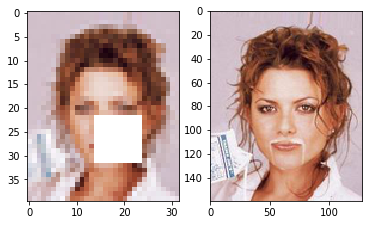

In [0]:
#사진을 읽고, 그것을 약간 변경해 보는 루틴이다.
#네트워크의 입력사진으로 변경하는 루틴으로 보면 된다.
# 참조 : https://github.com/mikesj-public/dcgan-autoencoder/blob/master/dataprocessing.py
#        dcgan-autoencoder
#!/usr/bin/env python

from PIL import Image
from os import listdir
from os.path import isfile, join
import numpy as np
import pickle
from time import time
import sys
import h5py
import random
from tqdm import tqdm
import matplotlib.pyplot as plt


im_loc = '/content/drive/My Drive/Colab Notebooks/celeba_short/img_align_celeba_short/'
print(im_loc)
#image_dir = 'img_align_celeba/'
image_dir = './'   
total_imgs = len(im_file_list)
print("found %i images in directory" %total_imgs)

def process_image(im):
    if im.mode != "RGB":
        im = im.convert("RGB")
    new_size = [int(i/1.3) for i in im.size]
    im.thumbnail(new_size, Image.ANTIALIAS)
    target = np.array(im)[3:-3,4:-4,:]
    im = Image.fromarray(target)

    new_size = [i/4 for i in im.size]
    im.thumbnail(new_size, Image.ANTIALIAS) #이미지 사이즈 조정
   
    inputt = np.array(im)

    y = random.randint(0, int(2 * (inputt.shape[0] / 3)))
    x = random.randint(0, int(2 * (inputt.shape[1] / 3)))
    dy = random.randint(10, int(inputt.shape[0] / 3))
    dx = random.randint(10, int(inputt.shape[1] / 3))
    #print(x,y,dx,dy)
    inputt[y:y + dy, x:x + dx] = np.array([255, 255, 255])
    #inputt = inputt.resize((160,128))  
    return inputt, target

def proc_loc(loc):
    try:
        i = Image.open(loc)
        input, target = process_image(i)
        return (input, target)
    except KeyboardInterrupt:
        raise
    except:
        return None
       
#check 
loc = np.random.randint(0, len(im_file_list))
print(loc)
#print(im_file_list[1])
im_loc = im_loc + im_file_list[loc] #1개의 이미지를 가지고 ...
#print(im_lo)
inputt, target = proc_loc(im_loc) 
plt.subplot(1,2,1)
plt.imshow(inputt)
plt.subplot(1,2,2)
plt.imshow(target)
plt.show()   

   #  ----------------------  GAN Implementation Example --------------------
# Image Completion with Deep Learning in TensorFlow
 -[Image Completion with Deep Learning in TensorFlow](http://bamos.github.io/2016/08/09/deep-completion/)
# Semantic Image Inpainting with Deep Generative Models
   -[Semantic Image Inpainting with Deep Generative Models](https://arxiv.org/abs/1607.07539)

# [code : bamos/dcgan-completion.tensorflow](https://github.com/bamos/dcgan-completion.tensorflow)

0. simple-distributions.py ; 불필요
1. utils.py 
2. ops.py
3. model.py
4. train-dcgan.py 
5. complete.py

[FLAGS 문제 해결을 위해 추가]
https://github.com/tensorflow/tensorflow/issues/17702; UnrecognizedFlagError: Unknown command line flag 'f'  17702 해결을 위해 추가

import sys

sys.argn = " --your flags -- placed here".split(" ")

tf.app.flags.DEFINE_string('f', '', 'kernel') # UnrecognizedFlagError: Unknown command line flag 'f'  #17702 문제 해결을 위해서 추가

# [ML NOTEBOOK  : Data Augmentations for n-Dimensional Image Input to CNNs](https://mlnotebook.github.io/) # [프로그램 설명서,BN등](https://mlnotebook.github.io/post/GAN4/)

In [2]:
# bamos/dcgan-completion.tensorflow
# https://github.com/bamos/dcgan-completion.tensorflow

# https://github.com/tensorflow/tensorflow/issues/17702; UnrecognizedFlagError: Unknown command line flag 'f'  #17702 해결을 위해 추가

import sys
sys.argn = " --your flags -- placed here".split(" ")
print(sys.argv,"\n")
print(sys.argn, "\n")

import tensorflow as tf


['/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py', '-f', '/root/.local/share/jupyter/runtime/kernel-39a7f2ee-663c-482f-b31c-09e7ac9f7195.json'] 

['', '--your', 'flags', '--', 'placed', 'here'] 



In [0]:
# 1. utils.py
# Original Version: Taehoon Kim (http://carpedm20.github.io)
#   + Source: https://github.com/carpedm20/DCGAN-tensorflow/blob/e30539fb5e20d5a0fed40935853da97e9e55eee8/utils.py
#   + License: MIT

"""
Some codes from https://github.com/Newmu/dcgan_code
"""
from __future__ import division
import math
import json
import random
import pprint
import scipy.misc
import numpy as np
from time import gmtime, strftime
from PIL import Image #추가

pp = pprint.PrettyPrinter()

get_stddev = lambda x, k_h, k_w: 1/math.sqrt(k_w*k_h*x.get_shape()[-1])

def get_image(image_path, image_size, is_crop=True):
    return transform(imread(image_path), image_size, is_crop)

def save_images(images, size, image_path):
    return imsave(inverse_transform(images), size, image_path)

def imread(path):
    return scipy.misc.imread(path, mode='RGB').astype(np.float)

def merge_images(images, size):
    return inverse_transform(images)

def merge(images, size):
    h, w = images.shape[1], images.shape[2]
    img = np.zeros((int(h * size[0]), int(w * size[1]), 3))
    for idx, image in enumerate(images):
        i = idx % size[1]
        j = idx // size[1]
        img[j*h:j*h+h, i*w:i*w+w, :] = image

    return img

def imsave(images, size, path):
    img = merge(images, size)
    return scipy.misc.imsave(path, (255*img).astype(np.uint8))

def center_crop(x, crop_h, crop_w=None, resize_w=64): #이미지의 센터부분을 잘라낸다
    if crop_w is None:
        crop_w = crop_h
    h, w = x.shape[:2]
    j = int(round((h - crop_h)/2.))
    i = int(round((w - crop_w)/2.))
    return scipy.misc.imresize(x[j:j+crop_h, i:i+crop_w],
                               [resize_w, resize_w])

def transform(image, npx=64, is_crop=True):
    # npx : # of pixels width/height of image
    if is_crop:
        cropped_image = center_crop(image, npx)
    else:
        cropped_image = image
    return np.array(cropped_image)/127.5 - 1.

def inverse_transform(images): # ???
    return (images+1.)/2.

def image_resize(image, size) : #추가
    image = image.thumbnail(size)    
    

def to_json(output_path, *layers):
    with open(output_path, "w") as layer_f:
        lines = ""
        for w, b, bn in layers:
            layer_idx = w.name.split('/')[0].split('h')[1]

            B = b.eval()

            if "lin/" in w.name:
                W = w.eval()
                depth = W.shape[1]
            else:
                W = np.rollaxis(w.eval(), 2, 0)
                depth = W.shape[0]

            biases = {"sy": 1, "sx": 1, "depth": depth, "w": ['%.2f' % elem for elem in list(B)]}
            if bn != None:
                gamma = bn.gamma.eval()
                beta = bn.beta.eval()

                gamma = {"sy": 1, "sx": 1, "depth": depth, "w": ['%.2f' % elem for elem in list(gamma)]}
                beta = {"sy": 1, "sx": 1, "depth": depth, "w": ['%.2f' % elem for elem in list(beta)]}
            else:
                gamma = {"sy": 1, "sx": 1, "depth": 0, "w": []}
                beta = {"sy": 1, "sx": 1, "depth": 0, "w": []}

            if "lin/" in w.name:
                fs = []
                for w in W.T:
                    fs.append({"sy": 1, "sx": 1, "depth": W.shape[0], "w": ['%.2f' % elem for elem in list(w)]})

                lines += """
                    var layer_%s = {
                        "layer_type": "fc",
                        "sy": 1, "sx": 1,
                        "out_sx": 1, "out_sy": 1,
                        "stride": 1, "pad": 0,
                        "out_depth": %s, "in_depth": %s,
                        "biases": %s,
                        "gamma": %s,
                        "beta": %s,
                        "filters": %s
                    };""" % (layer_idx.split('_')[0], W.shape[1], W.shape[0], biases, gamma, beta, fs)
            else:
                fs = []
                for w_ in W:
                    fs.append({"sy": 5, "sx": 5, "depth": W.shape[3], "w": ['%.2f' % elem for elem in list(w_.flatten())]})

                lines += """
                    var layer_%s = {
                        "layer_type": "deconv",
                        "sy": 5, "sx": 5,
                        "out_sx": %s, "out_sy": %s,
                        "stride": 2, "pad": 1,
                        "out_depth": %s, "in_depth": %s,
                        "biases": %s,
                        "gamma": %s,
                        "beta": %s,
                        "filters": %s
                    };""" % (layer_idx, 2**(int(layer_idx)+2), 2**(int(layer_idx)+2),
                             W.shape[0], W.shape[3], biases, gamma, beta, fs)
        layer_f.write(" ".join(lines.replace("'","").split()))

def make_gif(images, fname, duration=2, true_image=False):
  import moviepy.editor as mpy

  def make_frame(t):
    try:
      x = images[int(len(images)/duration*t)]
    except:
      x = images[-1]

    if true_image:
      return x.astype(np.uint8)
    else:
      return ((x+1)/2*255).astype(np.uint8)

  clip = mpy.VideoClip(make_frame, duration=duration)
  clip.write_gif(fname, fps = len(images) / duration)

def visualize(sess, dcgan, config, option):
  if option == 0:
    z_sample = np.random.uniform(-0.5, 0.5, size=(config.batch_size, dcgan.z_dim))
    samples = sess.run(dcgan.sampler, feed_dict={dcgan.z: z_sample})
    save_images(samples, [8, 8], './samples/test_%s.png' % strftime("%Y-%m-%d %H:%M:%S", gmtime()))
  elif option == 1:
    values = np.arange(0, 1, 1./config.batch_size)
    for idx in xrange(100):
      print(" [*] %d" % idx)
      z_sample = np.zeros([config.batch_size, dcgan.z_dim])
      for kdx, z in enumerate(z_sample):
        z[idx] = values[kdx]

      samples = sess.run(dcgan.sampler, feed_dict={dcgan.z: z_sample})
      save_images(samples, [8, 8], './samples/test_arange_%s.png' % (idx))
  elif option == 2:
    values = np.arange(0, 1, 1./config.batch_size)
    for idx in [random.randint(0, 99) for _ in xrange(100)]:
      print(" [*] %d" % idx)
      z = np.random.uniform(-0.2, 0.2, size=(dcgan.z_dim))
      z_sample = np.tile(z, (config.batch_size, 1))
      #z_sample = np.zeros([config.batch_size, dcgan.z_dim])
      for kdx, z in enumerate(z_sample):
        z[idx] = values[kdx]

      samples = sess.run(dcgan.sampler, feed_dict={dcgan.z: z_sample})
      make_gif(samples, './samples/test_gif_%s.gif' % (idx))
  elif option == 3:
    values = np.arange(0, 1, 1./config.batch_size)
    for idx in xrange(100):
      print(" [*] %d" % idx)
      z_sample = np.zeros([config.batch_size, dcgan.z_dim])
      for kdx, z in enumerate(z_sample):
        z[idx] = values[kdx]

      samples = sess.run(dcgan.sampler, feed_dict={dcgan.z: z_sample})
      make_gif(samples, './samples/test_gif_%s.gif' % (idx))
  elif option == 4:
    image_set = []
    values = np.arange(0, 1, 1./config.batch_size)

    for idx in xrange(100):
      print(" [*] %d" % idx)
      z_sample = np.zeros([config.batch_size, dcgan.z_dim])
      for kdx, z in enumerate(z_sample): z[idx] = values[kdx]

      image_set.append(sess.run(dcgan.sampler, feed_dict={dcgan.z: z_sample}))
      make_gif(image_set[-1], './samples/test_gif_%s.gif' % (idx))

    new_image_set = [merge(np.array([images[idx] for images in image_set]), [10, 10]) \
        for idx in range(64) + range(63, -1, -1)]
    make_gif(new_image_set, './samples/test_gif_merged.gif', duration=8)

In [0]:
#2. ops.py
# Original Version: Taehoon Kim (http://carpedm20.github.io)
#   + Source: https://github.com/carpedm20/DCGAN-tensorflow/blob/e30539fb5e20d5a0fed40935853da97e9e55eee8/ops.py
#   + License: MIT

import math
import numpy as np
import tensorflow as tf

from tensorflow.python.framework import ops

#from utils import *

class batch_norm(object):
    """Code modification of http://stackoverflow.com/a/33950177"""
    def __init__(self, epsilon=1e-5, momentum = 0.9, name="batch_norm"):
        with tf.variable_scope(name, reuse = True):
            self.epsilon = epsilon
            self.momentum = momentum

            self.name = name

    def __call__(self, x, train):
        return tf.contrib.layers.batch_norm(x, decay=self.momentum, updates_collections=None, epsilon=self.epsilon,
                                            center=True, scale=True, is_training=train, scope=self.name)

def binary_cross_entropy(preds, targets, name=None):
    """Computes binary cross entropy given `preds`.

    For brevity, let `x = `, `z = targets`.  The logistic loss is

        loss(x, z) = - sum_i (x[i] * log(z[i]) + (1 - x[i]) * log(1 - z[i]))

    Args:
        preds: A `Tensor` of type `float32` or `float64`.
        targets: A `Tensor` of the same type and shape as `preds`.
    """
    eps = 1e-12
    with ops.op_scope([preds, targets], name, "bce_loss") as name:
        preds = ops.convert_to_tensor(preds, name="preds")
        targets = ops.convert_to_tensor(targets, name="targets")
        return tf.reduce_mean(-(targets * tf.log(preds + eps) +
                              (1. - targets) * tf.log(1. - preds + eps)))

def conv_cond_concat(x, y):
    """Concatenate conditioning vector on feature map axis."""
    x_shapes = x.get_shape()
    y_shapes = y.get_shape()
    return tf.concat(3, [x, y*tf.ones([x_shapes[0], x_shapes[1], x_shapes[2], y_shapes[3]])])

def conv2d(input_, output_dim,
           k_h=5, k_w=5, d_h=2, d_w=2, stddev=0.02,
           name="conv2d"):
    with tf.variable_scope(name):
        w = tf.get_variable('w', [k_h, k_w, input_.get_shape()[-1], output_dim],
                            initializer=tf.truncated_normal_initializer(stddev=stddev))
        conv = tf.nn.conv2d(input_, w, strides=[1, d_h, d_w, 1], padding='SAME')

        biases = tf.get_variable('biases', [output_dim], initializer=tf.constant_initializer(0.0))
        # conv = tf.reshape(tf.nn.bias_add(conv, biases), conv.get_shape())
        conv = tf.nn.bias_add(conv, biases)

        return conv

def conv2d_transpose(input_, output_shape,
                     k_h=5, k_w=5, d_h=2, d_w=2, stddev=0.02,
                     name="conv2d_transpose", with_w=False):
    with tf.variable_scope(name):
        # filter : [height, width, output_channels, in_channels]
        w = tf.get_variable('w', [k_h, k_w, output_shape[-1], input_.get_shape()[-1]],
                            initializer=tf.random_normal_initializer(stddev=stddev))

        try:
            deconv = tf.nn.conv2d_transpose(input_, w, output_shape=output_shape,
                                strides=[1, d_h, d_w, 1])

        # Support for verisons of TensorFlow before 0.7.0
        except AttributeError:
            deconv = tf.nn.deconv2d(input_, w, output_shape=output_shape,
                                strides=[1, d_h, d_w, 1])

        biases = tf.get_variable('biases', [output_shape[-1]], initializer=tf.constant_initializer(0.0))
        # deconv = tf.reshape(tf.nn.bias_add(deconv, biases), deconv.get_shape())
        deconv = tf.nn.bias_add(deconv, biases)

        if with_w:
            return deconv, w, biases
        else:
            return deconv

def lrelu(x, leak=0.2, name="lrelu"):
    with tf.variable_scope(name):
        f1 = 0.5 * (1 + leak)
        f2 = 0.5 * (1 - leak)
        return f1 * x + f2 * abs(x)

def linear(input_, output_size, scope=None, stddev=0.02, bias_start=0.0, with_w=False):
    shape = input_.get_shape().as_list()
    #print('check_point_linear_1 :',shape)

    with tf.variable_scope(scope or "Linear", reuse=tf.AUTO_REUSE): #---------------------
        #print('check_point_linear_2')
        matrix = tf.get_variable("Matrix", [shape[1], output_size], tf.float32,
                                 tf.random_normal_initializer(stddev=stddev))
        #print('check_point_linear_3')
        bias = tf.get_variable("bias", [output_size],
            initializer=tf.constant_initializer(bias_start))
        #print('check_point_linear_4')
        if with_w:
            return tf.matmul(input_, matrix) + bias, matrix, bias
        else:
            return tf.matmul(input_, matrix) + bias

In [0]:
#어떤 특정 디렉토리에 저장을 하려면 먼저 디렉토리를 아래와 같이 만들어야 한다 ...
!mkdir './resized_image/'

In [6]:
# 3.model.py
# Original Version: Taehoon Kim (http://carpedm20.github.io)
#   + Source: https://github.com/carpedm20/DCGAN-tensorflow/blob/e30539fb5e20d5a0fed40935853da97e9e55eee8/model.py
#   + License: MIT
# [2016-08-05] Modifications for Completion: Brandon Amos (http://bamos.github.io)
#   + License: MIT

from __future__ import division
import os
import time
import math
import itertools
from glob import glob
import tensorflow as tf
from six.moves import xrange
from PIL import Image
import matplotlib.pyplot as plt
import tqdm
from tqdm import tqdm, tqdm_notebook
from tqdm import tqdm, trange

#---------------
def image_resize(image, size) : #추가
    image = image.thumbnail(size)    
# --------------

# 파일을 지정된 디렉토리로 다운로드, 필요시 전체 이미지 resizing
# Load the Drive helper and mount
def download_file() :
    from google.colab import drive
    """
    - This will prompt for authorization.
    - force_remount=True 는 강제적으로 mount를 재개할 때 사용합니다. 
    - 또한 drive 내 다른 폴더를 mount point로 지정할 수는 없는 것 같습니다. 
    """
    #drive.mount('/content/drive') #이것을 먼저사용한다.
    # 이후에 authentication code를 넣어 줘야한다, 실행을 하면 연결해야하는 URL이 주어지고, URL에 연결하면 코드를 얻을 수 있다. 이코드를 입력해 주면된다
    drive.mount('/content/drive', force_remount=True) # 중간에 끊어진 경우에 다시연결할 때 사용한다

    import os
    os.listdir("/content/drive/My Drive/")
    im_loc = '/content/drive/My Drive/Colab Notebooks/celeba_short/img_align_celeba_short/'
    
    im_file_list = glob(im_loc+"*.*")
    #print(im_loc)
    #print(im_file_list)

    path_to_dir ='./resized_image/'
    
    size = (64,64)
    for i in tqdm_notebook(range(min(len(im_file_list), 10000)), desc='사진 다운로드 & Resizing & 저장' ):
        file_name = im_file_list[i].split('/')[-1]
        im = Image.open(im_file_list[i])
        image = im.resize(size)
        #plt.imshow(image)
        #print("check_point_10")
        image.save(path_to_dir + file_name, "JPEG")
        #print("check_point_11")
        
    return path_to_dir       
# -------------------------------------------


#from ops import * #별도 파일로 작성하여 실행시 사용
#from utils import * #별도 파일로 작성하여 실행시 사용
SUPPORTED_EXTENSIONS = ["png", "jpg", "jpeg"]

def dataset_files(root): #root는 이미지가 들어 있는 루트 디렉토리이다.
    """Returns a list of all image files in the given directory; 데이터의 리스트를 만드는 루틴이다. root는 디렉토리 명 ???""" 
    return list(itertools.chain.from_iterable(
        glob(os.path.join(root, "*.{}".format(ext))) for ext in SUPPORTED_EXTENSIONS)) #3가지 종류의 확장자를 읽어 들일 수 있다.


class DCGAN(object):
    def __init__(self, sess, image_size=64, is_crop=False,
                 batch_size=64, sample_size=64, lowres=8,
                 z_dim=100, gf_dim=64, df_dim=64,
                 gfc_dim=1024, dfc_dim=1024, c_dim=3,
                 checkpoint_dir=None, lam=0.1, reuse = False, tr = 'y'):
        #print(' Reuse = ', reuse)
        """

        Args:
            sess: TensorFlow session
            batch_size: The size of batch. Should be specified before training.
            lowres: (optional) Low resolution image/mask shrink factor. [8]
            z_dim: (optional) Dimension of dim for Z. [100]
            gf_dim: (optional) Dimension of gen filters in first conv layer. [64]
            df_dim: (optional) Dimension of discrim filters in first conv layer. [64]
            gfc_dim: (optional) Dimension of gen untis for for fully connected layer. [1024]
            dfc_dim: (optional) Dimension of discrim units for fully connected layer. [1024]
            c_dim: (optional) Dimension of image color. [3]
        """
        # Currently, image size must be a (power of 2) and (8 or higher).
        assert(image_size & (image_size - 1) == 0 and image_size >= 8)
        #print('check_point_dc_gan_1')

        self.sess = sess
        self.is_crop = is_crop
        self.batch_size = batch_size
        self.image_size = image_size
        self.sample_size = sample_size
        self.image_shape = [image_size, image_size, c_dim]
        #print('check_point_dc_gan_2')
        
        self.lowres = lowres
        self.lowres_size = image_size // lowres
        self.lowres_shape = [self.lowres_size, self.lowres_size, c_dim]

        self.z_dim = z_dim

        self.gf_dim = gf_dim
        self.df_dim = df_dim

        self.gfc_dim = gfc_dim
        self.dfc_dim = dfc_dim

        self.lam = lam
        self.reuse = reuse
        self.tr = tr

        self.c_dim = c_dim
        
        #print('check_point_dc_gan_3')
        # batch normalization : deals with poor initialization helps gradient flow # 이부분을 체크하여야 한다..... 정밀하게 .....
        self.d_bns = [
            batch_norm(name='d_bn{}'.format(i,)) for i in range(4)]
        #print('check_point_dc_gan_4')

        log_size = int(math.log(image_size) / math.log(2))
        #print('check -- log_size = ', log_size)
        self.g_bns = [
            batch_norm(name='g_bn{}'.format(i,)) for i in range(log_size)] # 여기가 무엇을 하는 것인가 ????
        #print('check_point_dc_gan_5')
        
        self.checkpoint_dir = checkpoint_dir
        self.build_model()
        #print('check_point_dc_gan_6')
        self.model_name = "DCGAN.model"
        #print('check_point_dc_gan_7')
        
    def build_model(self):
        print('check_point_model_1')        
        self.is_training = tf.placeholder(tf.bool, name='is_training')
        #print('check_point_model_2')           
        self.images = tf.placeholder(
            tf.float32, [None] + self.image_shape, name='real_images')
        #print('check_point_model_3')           
        self.lowres_images = tf.reduce_mean(tf.reshape(self.images,
            [self.batch_size, self.lowres_size, self.lowres,
             self.lowres_size, self.lowres, self.c_dim]), [2, 4])
        self.z = tf.placeholder(tf.float32, [None, self.z_dim], name='z')
        self.z_sum = tf.summary.histogram("z", self.z)
        #print('check_point_model_4')

        if self.tr == 'y' :
            self.G = self.generator(self.z, reuse = False) # ------------------------------
        else : 
            self.G = self.generator(self.z, reuse = self.reuse) # ------------------------------

        #print('check_point_model_5')           
        self.lowres_G = tf.reduce_mean(tf.reshape(self.G,
            [self.batch_size, self.lowres_size, self.lowres,
             self.lowres_size, self.lowres, self.c_dim]), [2, 4])
        #print('check_point_model_6')
        if self.tr == 'y' :
            self.D, self.D_logits = self.discriminator(self.images, reuse = False) # self.discriminator(self.images, reuse = False) #------------------------
        else : 
            self.D, self.D_logits = self.discriminator(self.images, reuse = True) # self.discriminator(self.images, reuse = True) #------------------------
            
        #print('check_point_model_7') 
        if self.tr == 'y' :        
            self.D_, self.D_logits_ = self.discriminator(self.G, reuse = True) # self.discriminator(self.G, reuse = True) # -----------------------
        else :
            self.D_, self.D_logits_ = self.discriminator(self.G, reuse = self.reuse) #self.discriminator(self.G, reuse = self.reuse)# -----------------------
  
        #print('check_point_model_8')           

        self.d_sum = tf.summary.histogram("d", self.D)
        self.d__sum = tf.summary.histogram("d_", self.D_)
        self.G_sum = tf.summary.image("G", self.G)
        #print('check_point_model_9')           

        self.d_loss_real = tf.reduce_mean(
            tf.nn.sigmoid_cross_entropy_with_logits(logits=self.D_logits,
                                                    labels=tf.ones_like(self.D)))
        self.d_loss_fake = tf.reduce_mean(
            tf.nn.sigmoid_cross_entropy_with_logits(logits=self.D_logits_,
                                                    labels=tf.zeros_like(self.D_)))
        self.g_loss = tf.reduce_mean(
            tf.nn.sigmoid_cross_entropy_with_logits(logits=self.D_logits_,
                                                    labels=tf.ones_like(self.D_)))

        self.d_loss_real_sum = tf.summary.scalar("d_loss_real", self.d_loss_real)
        self.d_loss_fake_sum = tf.summary.scalar("d_loss_fake", self.d_loss_fake)

        self.d_loss = self.d_loss_real + self.d_loss_fake

        self.g_loss_sum = tf.summary.scalar("g_loss", self.g_loss)
        self.d_loss_sum = tf.summary.scalar("d_loss", self.d_loss)
        #print('check_point_model_10')           

        t_vars = tf.trainable_variables()

        self.d_vars = [var for var in t_vars if 'd_' in var.name]
        self.g_vars = [var for var in t_vars if 'g_' in var.name]

        #self.saver = tf.train.Checkpoint(max_to_keep=1)
        self.saver = tf.train.Saver(max_to_keep=1) #----------->  변수저장기
        #print('check_point_model_20')           

        # Completion.
        self.mask = tf.placeholder(tf.float32, self.image_shape, name='mask')
        self.lowres_mask = tf.placeholder(tf.float32, self.lowres_shape, name='lowres_mask')
        self.contextual_loss = tf.reduce_sum(
            tf.contrib.layers.flatten(
                tf.abs(tf.multiply(self.mask, self.G) - tf.multiply(self.mask, self.images))), 1)
        self.contextual_loss += tf.reduce_sum(
            tf.contrib.layers.flatten(
                tf.abs(tf.multiply(self.lowres_mask, self.lowres_G) - tf.multiply(self.lowres_mask, self.lowres_images))), 1)
        self.perceptual_loss = self.g_loss
        self.complete_loss = self.contextual_loss + self.lam*self.perceptual_loss
        self.grad_complete_loss = tf.gradients(self.complete_loss, self.z)
        #print('check_point_model_30') 
        
    #print('check_point_dc_gan_7')
        
    def train(self, config):
        print('트레이닝 시작 ...')
        data = dataset_files(config["dataset"].value) #데이터셋의 리스트를 받아온다.
        #data = dataset_files(config.dataset) #데이터셋의 리스트를 받아온다.
        #print('check_point_train_1 : ', config.dataset)
        np.random.shuffle(data)
        #print("length of data = ",len(data) )
        assert(len(data) > 0)


        d_optim = tf.train.AdamOptimizer(config.learning_rate, beta1=config.beta1) \
                          .minimize(self.d_loss, var_list=self.d_vars)
        g_optim = tf.train.AdamOptimizer(config.learning_rate, beta1=config.beta1) \
                          .minimize(self.g_loss, var_list=self.g_vars)                
        try:
            tf.global_variables_initializer().run()
        except:
            tf.initialize_all_variables().run()

        self.g_sum = tf.summary.merge(
            [self.z_sum, self.d__sum, self.G_sum, self.d_loss_fake_sum, self.g_loss_sum])
        self.d_sum = tf.summary.merge(
            [self.z_sum, self.d_sum, self.d_loss_real_sum, self.d_loss_sum])
        self.writer = tf.summary.FileWriter("./logs", self.sess.graph)

        sample_z = np.random.uniform(-1, 1, size=(self.sample_size , self.z_dim))
        sample_files = data[0:self.sample_size]

        sample = [get_image(sample_file, self.image_size, is_crop=self.is_crop) for sample_file in sample_files]
        sample_images = np.array(sample).astype(np.float32)

        counter = 1
        start_time = time.time()

        if self.load(self.checkpoint_dir): #------- 변수 로딩



            print("""
======
An existing model was found in the checkpoint directory.
If you just cloned this repository, it's a model for faces
trained on the CelebA dataset for 20 epochs.
If you want to train a new model from scratch,
delete the checkpoint directory or specify a different
--checkpoint_dir argument.
======

""")
        else:
            print("""

======
An existing model was not found in the checkpoint directory.
Initializing a new one.
======

""")
        #print('check_point_dc_gan_8')            
        print('sample image save to : ', config.sample_dir)
        for epoch in tqdm_notebook(xrange(config.epoch), desc = 'train_epoch') :
            data = dataset_files(config.dataset)
            batch_idxs = min(len(data), config.train_size) // self.batch_size

            for idx in xrange(0, batch_idxs) :
                batch_files = data[idx*config.batch_size:(idx+1)*config.batch_size]
                batch = [get_image(batch_file, self.image_size, is_crop=self.is_crop)
                         for batch_file in batch_files]
                batch_images = np.array(batch).astype(np.float32)

                batch_z = np.random.uniform(-1, 1, [config.batch_size, self.z_dim]) \
                            .astype(np.float32)

                # Update D network
                _, summary_str = self.sess.run([d_optim, self.d_sum],
                    feed_dict={ self.images: batch_images, self.z: batch_z, self.is_training: True })
                self.writer.add_summary(summary_str, counter)

                # Update G network
                _, summary_str = self.sess.run([g_optim, self.g_sum],
                    feed_dict={ self.z: batch_z, self.is_training: True })
                self.writer.add_summary(summary_str, counter)

                # Run g_optim twice to make sure that d_loss does not go to zero (different from paper)
                _, summary_str = self.sess.run([g_optim, self.g_sum],
                    feed_dict={ self.z: batch_z, self.is_training: True })
                self.writer.add_summary(summary_str, counter)

                errD_fake = self.d_loss_fake.eval({self.z: batch_z, self.is_training: False})
                errD_real = self.d_loss_real.eval({self.images: batch_images, self.is_training: False})
                errG = self.g_loss.eval({self.z: batch_z, self.is_training: False})

                counter += 1
                #print("Epoch: [{:2d}] [{:4d}/{:4d}] time: {:4.4f}, d_loss: {:.8f}, g_loss: {:.8f}".format(
                #    epoch, idx, batch_idxs, time.time() - start_time, errD_fake+errD_real, errG))

                if np.mod(counter, 100) == 1:
                    samples, d_loss, g_loss = self.sess.run(
                        [self.G, self.d_loss, self.g_loss],
                        feed_dict={self.z: sample_z, self.images: sample_images, self.is_training: False}
                    )
                    path = config.sample_dir + 'train_{:02d}_{:04d}.png'.format(epoch, idx) # 수정한 부분
                    save_images(samples, [8, 8], path)
                    #'./samples/train_{:02d}_{:04d}.png'.format(epoch, idx))                                                             
                    #print("[Sample] d_loss: {:.8f}, g_loss: {:.8f}".format(d_loss, g_loss))

                if np.mod(counter, 500) == 2:
                    self.save(config.checkpoint_dir, counter)

    print('check_point_dc_gan_9')
    def complete(self, config):
        def make_dir(name):
            # Works on python 2.7, where exist_ok arg to makedirs isn't available.
            p = os.path.join(config.outDir, name)
            if not os.path.exists(p):
                os.makedirs(p)
        make_dir('hats_imgs')
        make_dir('completed')
        make_dir('logs')
        
        #print('check_point_com_1')

        try:
            tf.global_variables_initializer().run()
        except:
            tf.initialize_all_variables().run()
        #print('check_point_com_1.1')
        print(self.checkpoint_dir)
        
        if self.load(self.checkpoint_dir): 
            print('Successfully Loaded')
        else :
            print('Unsuccessfully Loaded') 
                                
        isLoaded = self.load(self.checkpoint_dir)  # 변수로딩        
        #print('T_or_F :', isLoaded)
        #print('check_point_com_1.2')        
        assert(isLoaded)
        #print('check_point_com_2')
        
        nImgs = len(config.imgs)
        print('check__ ', config.imgs, nImgs)

        batch_idxs = int(np.ceil(nImgs/self.batch_size))
        lowres_mask = np.zeros(self.lowres_shape)
        if config.maskType == 'random':
            fraction_masked = 0.2
            mask = np.ones(self.image_shape)
            mask[np.random.random(self.image_shape[:2]) < fraction_masked] = 0.0
        elif config.maskType == 'center':
            assert(config.centerScale <= 0.5)
            mask = np.ones(self.image_shape)
            sz = self.image_size
            l = int(self.image_size*config.centerScale)
            u = int(self.image_size*(1.0-config.centerScale))
            mask[l:u, l:u, :] = 0.0
        elif config.maskType == 'left':
            mask = np.ones(self.image_shape)
            c = self.image_size // 2
            mask[:,:c,:] = 0.0
        elif config.maskType == 'full':
            mask = np.ones(self.image_shape)
        elif config.maskType == 'grid':
            mask = np.zeros(self.image_shape)
            mask[::4,::4,:] = 1.0
        elif config.maskType == 'lowres':
            lowres_mask = np.ones(self.lowres_shape)
            mask = np.zeros(self.image_shape)
        else:
            assert(False)
            
        #print('check_point_com_3')        #  여기까지 OK .........  
        #print(" batch_idx :", batch_idxs )

        for idx in tqdm_notebook(xrange(0, batch_idxs), desc = 'completion') :
            l = idx*self.batch_size
            u = min((idx+1)*self.batch_size, nImgs)
            #print('check_point_com_3_1')
            batchSz = u-l
            batch_files = config.imgs[l:u]
            #print('check_point_com_3_1_1')  
            #print(batch_files)
            batch = [get_image(batch_file, self.image_size, is_crop=self.is_crop)
                     for batch_file in batch_files]
            #print('check_point_com_3_2')
            batch_images = np.array(batch).astype(np.float32)
            #print('check_point_com_3_3')
            if batchSz < self.batch_size:
                #print(batchSz)
                padSz = ((0, int(self.batch_size-batchSz)), (0,0), (0,0), (0,0))
                batch_images = np.pad(batch_images, padSz, 'constant')
                batch_images = batch_images.astype(np.float32)
            #print('check_point_com_3_3')
            zhats = np.random.uniform(-1, 1, size=(self.batch_size, self.z_dim))
            m = 0
            v = 0
            #print('check_point_com_4')
            
            nRows = np.ceil(batchSz/8)
            nCols = min(8, batchSz)
            save_images(batch_images[:batchSz,:,:,:], [nRows,nCols],
                        os.path.join(config.outDir, 'before.png'))
            masked_images = np.multiply(batch_images, mask)
            save_images(masked_images[:batchSz,:,:,:], [nRows,nCols],
                        os.path.join(config.outDir, 'masked.png'))
            #print('check_point_com_5')
            if lowres_mask.any():
                lowres_images = np.reshape(batch_images, [self.batch_size, self.lowres_size, self.lowres,
                    self.lowres_size, self.lowres, self.c_dim]).mean(4).mean(2)
                lowres_images = np.multiply(lowres_images, lowres_mask)
                lowres_images = np.repeat(np.repeat(lowres_images, self.lowres, 1), self.lowres, 2)
                save_images(lowres_images[:batchSz,:,:,:], [nRows,nCols],
                            os.path.join(config.outDir, 'lowres.png'))
            #print('check_point_com_6')                
            for img in range(batchSz):
                with open(os.path.join(config.outDir, 'logs/hats_{:02d}.log'.format(img)), 'a') as f:
                    f.write('iter loss ' +
                            ' '.join(['z{}'.format(zi) for zi in range(self.z_dim)]) +
                            '\n')
            #print('check_point_com_7')
            
            for i in xrange(config.nIter):
                fd = {
                    self.z: zhats,
                    self.mask: mask,
                    self.lowres_mask: lowres_mask,
                    self.images: batch_images,
                    self.is_training: False
                }
                #print('check_point_com_8')
                run = [self.complete_loss, self.grad_complete_loss, self.G, self.lowres_G]
                loss, g, G_imgs, lowres_G_imgs = self.sess.run(run, feed_dict=fd)
                #print('check_point_com_9')
                for img in range(batchSz):
                    with open(os.path.join(config.outDir, 'logs/hats_{:02d}.log'.format(img)), 'ab') as f:
                        f.write('{} {} '.format(i, loss[img]).encode())
                        np.savetxt(f, zhats[img:img+1])

                if i % config.outInterval == 0:
                    #print(i, np.mean(loss[0:batchSz]))
                    imgName = os.path.join(config.outDir,
                                           'hats_imgs/{:04d}.png'.format(i))
                    nRows = np.ceil(batchSz/8)
                    nCols = min(8, batchSz)
                    save_images(G_imgs[:batchSz,:,:,:], [nRows,nCols], imgName)
                    if lowres_mask.any():
                        imgName = imgName[:-4] + '.lowres.png'
                        save_images(np.repeat(np.repeat(lowres_G_imgs[:batchSz,:,:,:],
                                              self.lowres, 1), self.lowres, 2),
                                    [nRows,nCols], imgName)

                    inv_masked_hat_images = np.multiply(G_imgs, 1.0-mask)
                    completed = masked_images + inv_masked_hat_images
                    imgName = os.path.join(config.outDir,
                                           'completed/{:04d}.png'.format(i))
                    save_images(completed[:batchSz,:,:,:], [nRows,nCols], imgName)

                if config.approach == 'adam':
                    # Optimize single completion with Adam
                    m_prev = np.copy(m)
                    v_prev = np.copy(v)
                    m = config.beta1 * m_prev + (1 - config.beta1) * g[0]
                    v = config.beta2 * v_prev + (1 - config.beta2) * np.multiply(g[0], g[0])
                    m_hat = m / (1 - config.beta1 ** (i + 1))
                    v_hat = v / (1 - config.beta2 ** (i + 1))
                    zhats += - np.true_divide(config.lr * m_hat, (np.sqrt(v_hat) + config.eps))
                    zhats = np.clip(zhats, -1, 1)

                elif config.approach == 'hmc':
                    # Sample example completions with HMC (not in paper)
                    zhats_old = np.copy(zhats)
                    loss_old = np.copy(loss)
                    v = np.random.randn(self.batch_size, self.z_dim)
                    v_old = np.copy(v)

                    for steps in range(config.hmcL):
                        v -= config.hmcEps/2 * config.hmcBeta * g[0]
                        zhats += config.hmcEps * v
                        np.copyto(zhats, np.clip(zhats, -1, 1))
                        loss, g, _, _ = self.sess.run(run, feed_dict=fd)
                        v -= config.hmcEps/2 * config.hmcBeta * g[0]

                    for img in range(batchSz):
                        logprob_old = config.hmcBeta * loss_old[img] + np.sum(v_old[img]**2)/2
                        logprob = config.hmcBeta * loss[img] + np.sum(v[img]**2)/2
                        accept = np.exp(logprob_old - logprob)
                        if accept < 1 and np.random.uniform() > accept:
                            np.copyto(zhats[img], zhats_old[img])

                    config.hmcBeta *= config.hmcAnneal

                else:
                    assert(False)
                    
    #print('check_point_dc_gan_10')
 
    def discriminator(self, image, reuse = False) :
        #print('check check :', reuse)
        with tf.variable_scope("discriminator", reuse = reuse) as scope:
            if reuse:
                scope.reuse_variables()

            # TODO: Investigate how to parameterise discriminator based off image size.
            h0 = lrelu(conv2d(image, self.df_dim, name='d_h0_conv'))
            h1 = lrelu(self.d_bns[0](conv2d(h0, self.df_dim*2, name='d_h1_conv'), self.is_training))
            h2 = lrelu(self.d_bns[1](conv2d(h1, self.df_dim*4, name='d_h2_conv'), self.is_training))
            h3 = lrelu(self.d_bns[2](conv2d(h2, self.df_dim*8, name='d_h3_conv'), self.is_training))
            h4 = linear(tf.reshape(h3, [-1, 8192]), 1, 'd_h4_lin')
    
            return tf.nn.sigmoid(h4), h4

    #print('check_point_dc_gan_11')

    def generator(self, z, reuse = False): # -----------
        #print('Gen_Reuse : ', reuse)
        with tf.variable_scope("generator", reuse = reuse ) as scope:
            #print('check_point_generator_1')
            self.z_, self.h0_w, self.h0_b = linear(z, self.gf_dim*8*4*4, 'g_h0_lin', with_w=True)
            #print('check_point_generator_2')    
            # TODO: Nicer iteration pattern here. #readability
            hs = [None]
            #print('check_point_generator_3')
            hs[0] = tf.reshape(self.z_, [-1, 4, 4, self.gf_dim * 8])
            #print('check_point_generator_4 : ', hs[0])
            hs[0] = tf.nn.relu(self.g_bns[0](hs[0], self.is_training)) # 이부분을 제대로 체크하자!
            #print('check_point_generator_5')
            i = 1 # Iteration number.
            depth_mul = 8  # Depth decreases as spatial component increases.
            size = 8  # Size increases as depth decreases.
            #print('check_point_generator_6')
            while size < self.image_size:
                hs.append(None)
                name = 'g_h{}'.format(i)
                hs[i], _, _ = conv2d_transpose(hs[i-1],
                    [self.batch_size, size, size, self.gf_dim*depth_mul], name=name, with_w=True)
                hs[i] = tf.nn.relu(self.g_bns[i](hs[i], self.is_training))

                i += 1
                depth_mul //= 2
                size *= 2
                
            #print('check_point_generator_7')
            
            hs.append(None)
            name = 'g_h{}'.format(i)
            hs[i], _, _ = conv2d_transpose(hs[i - 1],
                [self.batch_size, size, size, 3], name=name, with_w=True)
            #print('check_point_generator_8')    
            return tf.nn.tanh(hs[i])

    def save(self, checkpoint_dir, step):
        if not os.path.exists(checkpoint_dir):
            os.makedirs(checkpoint_dir)

        self.saver.save(self.sess,
                        os.path.join(checkpoint_dir, self.model_name),
                        global_step=step)
        print('변수 저장됨 ---')

    def load(self, checkpoint_dir):
        print(" [*] Reading checkpoints...")
        ckpt = tf.train.get_checkpoint_state(checkpoint_dir)

        #print('check_point_load_1')
        if ckpt and ckpt.model_checkpoint_path:
            print('ckpt : ', ckpt)
            print('ckpt_path', ckpt.model_checkpoint_path)
            #imported_graph = tf.train.import_meta_graph('./Inpainting/checkpoint_dir/DCGAN.model-2002.meta') #수정/추가
            imported_graph = tf.train.import_meta_graph(ckpt.model_checkpoint_path + '.meta') #수정/추가
            imported_graph.restore(self.sess, ckpt.model_checkpoint_path) #/수정/추가
            #self.saver.restore(self.sess, ckpt.model_checkpoint_path)           
            #print('check_point_load_1_ok, 변수 Restore 됨 ---')            
            return True
        else:
            #print('check_point_load_1_nok')            
            return False
    #print('check_point_dc_gan_last')

check_point_dc_gan_9


In [0]:
# 4. train-dcgan.py
#!/usr/bin/env python3

# Original Version: Taehoon Kim (http://carpedm20.github.io)
#   + Source: https://github.com/carpedm20/DCGAN-tensorflow/blob/e30539fb5e20d5a0fed40935853da97e9e55eee8/main.py
#   + License: MIT
# [2016-08-05] Modifications for Inpainting: Brandon Amos (http://bamos.github.io)
#   + License: MIT
# [2019-05] 수정

import os
import scipy.misc
import numpy as np

# from model import DCGAN # 별도 파일로 작성시 사용
#!pip install utils
#from utils import pp, visualize, to_json

#import tensorflow as tf
#tf.reset_default_graph()

#from absl import app

#-----------------------------------
# tf.flags clear하는 방법
def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()
    keys_list = [keys for keys in flags_dict]
    for keys in keys_list:
        FLAGS.__delattr__(keys)

del_all_flags(tf.flags.FLAGS)
#-----------------------------------

#-----------------------------------
#imagefile download, get the directory; 이미지 파일을 다운로드 한다, 그리고 파일 사이즈를 변경한다.
#download_file()
dataset_dir = download_file()
print('check_point_1 : ', dataset_dir)
#-----------------------------------

flags = tf.app.flags
FLAGS = flags.FLAGS

flags.DEFINE_integer("epoch", 25, "Epoch to train [25]")
flags.DEFINE_float("learning_rate", 0.0002, "Learning rate of for adam [0.0002]")
flags.DEFINE_float("beta1", 0.5, "Momentum term of adam [0.5]")
#flags.DEFINE_integer("train_size", np.inf, "The size of train images [np.inf]")
flags.DEFINE_integer("train_size", 10000000000000000, "The size of train images [np.inf]") #np.inf를 잘 인식하지 못한다 ???

flags.DEFINE_integer("batch_size", 64, "The size of batch images [64]")
flags.DEFINE_integer("image_size", 64, "The size of image to use")
#flags.DEFINE_string("dataset", "lfw-aligned-64", "Dataset directory.") # 이미지가 들어얐는 디렉토리를 말한다.
flags.DEFINE_string("dataset", dataset_dir, "Dataset directory.") # 이미지가 들어있는 디렉토리를 말한다.
flags.DEFINE_string("checkpoint_dir", "./Inpainting/checkpoint_dir", "Directory name to save the checkpoints [checkpoint]")
flags.DEFINE_string("sample_dir", "./Inpainting/sample_dir", "Directory name to save the image samples [samples]")


#FLAGS = flags.FLAGS
#------------------------------------
#플래그 값 읽기 확인 및 ???
#print('check_point_2 : ', FLAGS["dataset"].value)
image_file_list = dataset_files(FLAGS["dataset"].value)
#print('check_point_3 : ', FLAGS["dataset"].value)
#print(image_file_list )
#------------------------------------

# 플래그를 사용하지 않고 직접 값을 주는 경우 ...
#if not os.path.exists("./Inpainting/checkpoint_dir"):
#    os.makedirs("./Inpainting/checkpoint_dir")
#if not os.path.exists("./Inpainting/sample_dir"):
#    os.makedirs("./Inpainting/sample_dir")
    
if not os.path.exists(FLAGS['checkpoint_dir'].value):
    os.makedirs(FLAGS['checkpoint_dir'].value)
if not os.path.exists(FLAGS['sample_dir'].value):
    os.makedirs(FLAGS['sample_dir'].value)

config = tf.ConfigProto()  #??? 이게 뭔고
config.gpu_options.allow_growth = True #???

tf.reset_default_graph()
init = tf.global_variables_initializer() # 추가
with tf.Session(config=config) as sess:
    sess.run(init) # 추가
    dcgan = DCGAN(sess, image_size=FLAGS['image_size'].value, batch_size=FLAGS['batch_size'].value,
                  is_crop=False, checkpoint_dir=FLAGS['checkpoint_dir'].value, reuse = True, tr = 'y')
    
    tf.app.flags.DEFINE_string('f', ' ', 'kernel') # UnrecognizedFlagError: Unknown command line flag 'f'  #17702 문제 해결을 위해서 추가    
    dcgan.train(FLAGS)
    


Mounted at /content/drive


In [0]:
# Create a local file with data to upload.
with open('/tmp/to_upload.txt', 'w') as f:
  f.write('my sample file')

import uuid

# Make a unique bucket to which we'll upload the file.
# (GCS buckets are part of a single global namespace.)
bucket_name = 'colab-sample-bucket-' + str(uuid.uuid1())

# Full reference: https://cloud.google.com/storage/docs/gsutil/commands/mb
!gsutil mb gs://{bucket_name}

# Copy the file to our new bucket.
# Full reference: https://cloud.google.com/storage/docs/gsutil/commands/cp
!gsutil cp /tmp/to_upload.txt gs://{bucket_name}/
  
# Finally, dump the contents of our newly copied file to make sure everything worked.
!gsutil cat gs://{bucket_name}/to_upload.txt

In [0]:
# dcgan-completion.tensorflow/complete.py
#!/usr/bin/env python3
#
# Brandon Amos (http://bamos.github.io)
# License: MIT
# 2016-08-05

import argparse
import os
import tensorflow as tf
import sys
import glob

#tf.reset_default_graph() # 이것에 따라서 self.reuse 등등이 바뀐다....
#from easydict import EasyDict as edict
#sys.argn = " --your flags -- placed here".split(" ")
#tf.app.flags.DEFINE_string('f', '', 'kernel')
# from model import DCGAN

parser = argparse.ArgumentParser()

parser.add_argument('--approach', type=str,
                    choices=['adam', 'hmc'],
                    default='adam')
parser.add_argument('--lr', type=float, default=0.01)
parser.add_argument('--beta1', type=float, default=0.9)
parser.add_argument('--beta2', type=float, default=0.999)
parser.add_argument('--eps', type=float, default=1e-8)
parser.add_argument('--hmcBeta', type=float, default=0.2)
parser.add_argument('--hmcEps', type=float, default=0.001)
parser.add_argument('--hmcL', type=int, default=100)
parser.add_argument('--hmcAnneal', type=float, default=1)
parser.add_argument('--nIter', type=int, default=1000)
parser.add_argument('--imgSize', type=int, default=64)
parser.add_argument('--lam', type=float, default=0.1)
parser.add_argument('--checkpointDir', type=str, default="./Inpainting/checkpoint_dir") #수정된 부분
parser.add_argument('--outDir', type=str, default='completions')
parser.add_argument('--outInterval', type=int, default=50)
parser.add_argument('--maskType', type=str,
                    choices=['random', 'center', 'left', 'full', 'grid', 'lowres'],
                    default='center')
parser.add_argument('--centerScale', type=float, default=0.25)

#---------------------------------------------- #오늘은 여기까지 ????????
path_to = './resized_image/*.jpg'
imgs_list = glob.glob(path_to)
parser.add_argument('--imgs', type=str, nargs='+', default = imgs_list) #파일을 주어야 하는가 ???
# 파일들의 리스트를 주어야 하는가 ?????????

#------------------------------------------------------
# 경우마다 틀리는 것 같다
#args = parser.parse_args(' ') # 잘동작함(스페이스 한칸 있어야 함)
args = parser.parse_args(sys.argv[3:]) #동작 숫자는 시스템의것을 체크해서 정해야 한다....
#args = parser.parse_known_args()[0] #잘동작함
#args = edict({                         #argparse 대신에 easydict를 사용하는 방법도 있다 !!!!!!!
#    'approach' : 'adam',
#    'beta1' : 0.01,
#    'beta2' : 0.999,
#    'check⁶pointDir' : 'checkpoint'   
#    
#    })
#------------------------------------------------------

#!mkdir 'checkpoint'
#print('check_point_com_1',len(args))
print('check_point_com_2', args)
assert(os.path.exists(args.checkpointDir))

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
print("complete : ", args.imgSize,args.imgs, args.checkpointDir,args.checkpointDir)


tf.reset_default_graph() 
init = tf.global_variables_initializer() # 추가

with tf.Session(config=config) as sess:
    sess.run(init) # 추가
    dcgan = DCGAN(sess, image_size=args.imgSize,
                  batch_size=min(64, len(args.imgs)),
                  checkpoint_dir=args.checkpointDir, lam=args.lam, reuse=True, tr = 'y')
    print('check_point_com_1', sys.argv)            
    dcgan.complete(args)
    



# FLAG문제, --call-- 이해를 위한 보조

In [0]:


# 플래그 문제 해결을 위한 곳임 .....
# https://stackoverflow.com/questions/49916921/how-to-clear-tf-flags
import tensorflow as tf
import os
import numpy as np

tf.reset_default_graph()

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()
    keys_list = [keys for keys in flags_dict]
    for keys in keys_list:
        FLAGS.__delattr__(keys)

del_all_flags(tf.flags.FLAGS)

flags = tf.app.flags
flags.DEFINE_integer("epoch", 25, "Epoch to train [25]")
flags.DEFINE_float("learning_rate", 0.0002, "Learning rate of for adam [0.0002]")
flags.DEFINE_float("beta1", 0.5, "Momentum term of adam [0.5]")
#flags.DEFINE_integer("train_size", np.inf, "The size of train images [np.inf]")
flags.DEFINE_integer("train_size", 10000000000000000, "The size of train images [np.inf]")

flags.DEFINE_integer("batch_size", 64, "The size of batch images [64]")
flags.DEFINE_integer("image_size", 64, "The size of image to use")
flags.DEFINE_string("dataset", "lfw-aligned-64", "Dataset directory.")
flags.DEFINE_string("checkpoint_dir", "checkpoint", "Directory name to save the checkpoints [checkpoint]")
flags.DEFINE_string("sample_dir", "samples", "Directory name to save the image samples [samples]")
FLAGS = flags.FLAGS

if not os.path.exists("./Inpainting/checkpoint_dir"):
    os.makedirs("./Inpainting/checkpoint_dir")
if not os.path.exists("./Inpainting/sample_dir"):
    os.makedirs("./Inpainting/sample_dir")
    
#if not os.path.exists(FLAGS.checkpoint_dir):
#    os.makedirs(FLAGS.checkpoint_dir)
#if not os.path.exists(FLAGS.sample_dir):
#    os.makedirs(FLAGS.sample_dir)

#----------------------------------------------
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

#args = parser.parse_args('')
#args = parser.parse_args(argv[1:]) #동작 않음
args = parser.parse_known_args()[0]

#args = edict({                         #argparse 대신에 easydict를 사용하는 방법도 있다 !!!!!!!
#    'approach' : 'adam',
#    'beta1' : 0.01,
#    'beta2' : 0.999,
#    'checkpointDir' : 'checkpoint'   
#    
#    }) 


In [0]:

# --call-- 관련 내용임 ...
import tensorflow as tf
import math



class batch_norm(object):

    """Code modification of http://stackoverflow.com/a/33950177"""
    def __init__(self, epsilon=1e-5, momentum = 0.9, name="batch_norm"):
        with tf.variable_scope(name):
            self.epsilon = epsilon
            self.momentum = momentum
            self.name = name

    def __call__(self, x, train):
        #print('call')

        return x + train
'''
        return tf.contrib.layers.batch_norm(x, decay=self.momentum, updates_collections=None, epsilon=self.epsilon,
                                           center=True, scale=True, is_training=train, scope=self.name)

a =batch_norm()
b = a(1,2)
print(a)
print(b)
'''
image_size = 64
log_size = int(math.log(image_size) / math.log(2))
print('check -- log_size = ', log_size)

g_bns = [batch_norm(name='g_bn{}'.format(i,)) for i in range(log_size)]
for i in range(log_size) :
    print(g_bns[i].name) 
print(g_bns[0](10,20))

#hs[0] = tf.reshape(self.z_, [-1, 4, 4, self.gf_dim * 8])
#print('check_point_generator_4 : ', hs[0])
#hs[0] = tf.nn.relu(self.g_bns[0](hs[0], self.is_training)) # 이부분을 제대로 체크하자!



#self.d_bns = [batch_norm(name='d_bn{}'.format(i,)) for i in range(4)]
d_bns = [batch_norm(name='d_bn{}'.format(i,)) for i in range(4)]
[d_bns[i](0,2*i) for i in range(4)]



# IMAGE INPAINTING
[image-inpainting](https://github.com/topics/image-inpainting)

# Generative Adversarial Denoising Autoencoder for Face Completion
[dcgan-denosing-autoencoder](https://github.com/avealle/dcgan-denosing-autoencoder)

# Semantic Image Inpainting with Deep Generative Models, CVPR2017

[Semantic Image Inpainting TensorFlow](https://github.com/ChengBinJin/semantic-image-inpainting)

[moodoki/semantic_image_inpainting ](https://github.com/moodoki/semantic_image_inpainting)














































[Use Tensorboard in Google Colab](https://medium.com/@tommytao_54597/use-tensorboard-in-google-colab-16b4bb9812a6)

In [0]:
!pip install tensorboardcolab

from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

tbc=TensorBoardColab()

summary_writer = tbc.get_writer()

# tensorboardcolab library has the method that returns FileWriter object pointing to above './Graph' location.

